Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Load Data

In [2]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
df.head()

ID       Country  Population_Size  Age  Gender Smoker  Years_of_Smoking  \
0   0         China             1400   80    Male    Yes                30   
1   1          Iran               84   53    Male     No                 0   
2   2        Mexico              128   47    Male    Yes                12   
3   3     Indonesia              273   39  Female     No                 0   
4   4  South Africa               59   44  Female     No                 0   

   Cigarettes_per_Day Passive_Smoker Family_History  ...  \
0                  29             No             No  ...   
1                   0            Yes             No  ...   
2                   6            Yes             No  ...   
3                   0             No            Yes  ...   
4                   0            Yes             No  ...   

  Air_Pollution_Exposure Occupational_Exposure  Indoor_Pollution  \
0                    Low                   Yes                No   
1                    Low                   Yes                No   
2                 Medium                    No                No   
3                    Low                    No                No   
4                 Medium                   Yes                No   

  Healthcare_Access Early_Detection Treatment_Type Developed_or_Developing  \
0              Poor              No            NaN              Developing   
1              Poor              No            NaN              Developing   
2              Poor             Yes            NaN              Developing   
3              Poor              No            NaN              Developing   
4              Poor              No            NaN              Developing   

  Annual_Lung_Cancer_Deaths Lung_Cancer_Prevalence_Rate Mortality_Rate  
0                    690000                        2.44            0.0  
1                     27000                        2.10            0.0  
2                     28000                        1.11            0.0  
3                     40000                        0.75            0.0  
4                     15000                        2.44            0.0  

[5 rows x 24 columns]

Data Preprocessing

In [3]:
df.drop(columns=['ID'],inplace=True)

In [4]:
df.columns

Index(['Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      220632 non-null  object 
 1   Population_Size              220632 non-null  int64  
 2   Age                          220632 non-null  int64  
 3   Gender                       220632 non-null  object 
 4   Smoker                       220632 non-null  object 
 5   Years_of_Smoking             220632 non-null  int64  
 6   Cigarettes_per_Day           220632 non-null  int64  
 7   Passive_Smoker               220632 non-null  object 
 8   Family_History               220632 non-null  object 
 9   Lung_Cancer_Diagnosis        220632 non-null  object 
 10  Cancer_Stage                 8961 non-null    object 
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  object 
 13 

In [6]:
df.dtypes

Country                         object
Population_Size                  int64
Age                              int64
Gender                          object
Smoker                          object
Years_of_Smoking                 int64
Cigarettes_per_Day               int64
Passive_Smoker                  object
Family_History                  object
Lung_Cancer_Diagnosis           object
Cancer_Stage                    object
Survival_Years                   int64
Adenocarcinoma_Type             object
Air_Pollution_Exposure          object
Occupational_Exposure           object
Indoor_Pollution                object
Healthcare_Access               object
Early_Detection                 object
Treatment_Type                  object
Developed_or_Developing         object
Annual_Lung_Cancer_Deaths        int64
Lung_Cancer_Prevalence_Rate    float64
Mortality_Rate                 float64
dtype: object

In [7]:
df.describe()   

Population_Size            Age  Years_of_Smoking  Cigarettes_per_Day  \
count    220632.000000  220632.000000     220632.000000       220632.000000   
mean        229.779882      52.518352          8.175274            7.007515   
std         349.247477      19.078215         12.377248            9.802187   
min          54.000000      20.000000          0.000000            0.000000   
25%          83.000000      36.000000          0.000000            0.000000   
50%         113.000000      53.000000          0.000000            0.000000   
75%         206.000000      69.000000         15.000000           14.000000   
max        1400.000000      85.000000         40.000000           30.000000   

       Survival_Years  Annual_Lung_Cancer_Deaths  Lung_Cancer_Prevalence_Rate  \
count   220632.000000              220632.000000                220632.000000   
mean         0.223526               63931.086928                     1.502085   
std          1.231025              130690.126777                     0.578043   
min          0.000000               10005.000000                     0.500000   
25%          0.000000               23000.000000                     1.000000   
50%          0.000000               30000.000000                     1.500000   
75%          0.000000               45000.000000                     2.000000   
max         10.000000              690000.000000                     2.500000   

       Mortality_Rate  
count   220632.000000  
mean         3.049802  
std         14.924169  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max         90.000000

Notes:
Annual_Lung_Cancer_Deaths per Country
Lung_Cancer_Prevalence_Rate per Country

In [8]:
df.describe(include='object')

Country  Gender  Smoker Passive_Smoker Family_History  \
count   220632  220632  220632         220632         220632   
unique      25       2       2              2              2   
top      Japan  Female      No             No             No   
freq      8989  110488  132291         154670         187807   

       Lung_Cancer_Diagnosis Cancer_Stage Adenocarcinoma_Type  \
count                 220632         8961              220632   
unique                     2            4                   2   
top                       No      Stage 4                  No   
freq                  211671         2387              121139   

       Air_Pollution_Exposure Occupational_Exposure Indoor_Pollution  \
count                  220632                220632           220632   
unique                      3                     2                2   
top                    Medium                    No               No   
freq                   110157                154115           169619   

       Healthcare_Access Early_Detection Treatment_Type  \
count             220632          220632           6664   
unique                 2               2              3   
top                 Poor              No        Surgery   
freq              176543          158913           2272   

       Developed_or_Developing  
count                   220632  
unique                       2  
top                 Developing  
freq                    167741

In [9]:
df.isna().sum()   #cancer stage -> 252 NAN  , tratment stage -> 2549

Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [10]:
df.nunique()

Country                          25
Population_Size                  25
Age                              66
Gender                            2
Smoker                            2
Years_of_Smoking                 41
Cigarettes_per_Day               27
Passive_Smoker                    2
Family_History                    2
Lung_Cancer_Diagnosis             2
Cancer_Stage                      4
Survival_Years                   11
Adenocarcinoma_Type               2
Air_Pollution_Exposure            3
Occupational_Exposure             2
Indoor_Pollution                  2
Healthcare_Access                 2
Early_Detection                   2
Treatment_Type                    3
Developed_or_Developing           2
Annual_Lung_Cancer_Deaths      8079
Lung_Cancer_Prevalence_Rate     201
Mortality_Rate                 2849
dtype: int64

In [11]:
df['Mortality_Rate'].value_counts()  # No Molarity Rate for those have no cancer

Mortality_Rate
0.00     211671
70.38        10
84.23        10
75.04        10
82.11        10
          ...  
82.29         1
88.97         1
71.55         1
70.68         1
74.28         1
Name: count, Length: 2849, dtype: int64

In [12]:
df['Annual_Lung_Cancer_Deaths'].value_counts()   # should be 25 distict values ?

Annual_Lung_Cancer_Deaths
45000    17527
75000     8989
18000     8975
29000     8966
33000     8920
         ...  
33228        1
20662        1
54735        1
30630        1
10722        1
Name: count, Length: 8079, dtype: int64

In [13]:
df['Lung_Cancer_Prevalence_Rate'].value_counts()        # should be 25 distict values ?

Lung_Cancer_Prevalence_Rate
1.35    1178
2.39    1175
1.65    1174
0.58    1174
0.92    1167
        ... 
0.72    1021
1.29    1020
0.71    1004
2.50     567
0.50     535
Name: count, Length: 201, dtype: int64

In [14]:
df.duplicated().sum()  #252
df.drop_duplicates(inplace=True)   #clear duplicates

In [15]:
df.isna().sum()

Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211419
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213716
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

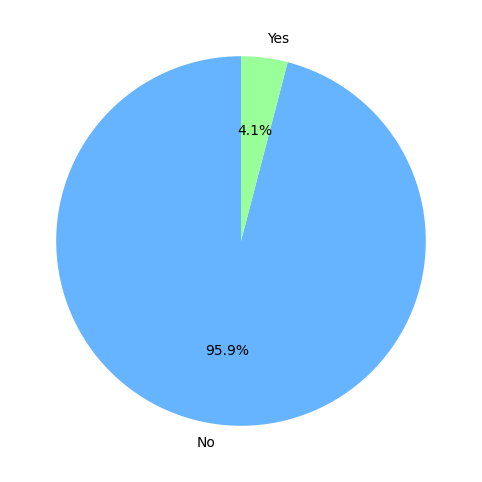

In [16]:
Lung_Cancer_count=df['Lung_Cancer_Diagnosis'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(Lung_Cancer_count.values,labels=Lung_Cancer_count.index,autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.show()    # not balanced

In [17]:
# drop nulls
df = df[~((df['Lung_Cancer_Diagnosis'] == 'Yes') & (df['Treatment_Type'].isna()))]

In [18]:
df.isna().sum() # no nulls in data

Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211419
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 211419
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [19]:
df['Lung_Cancer_Diagnosis'].value_counts() #not balanced

Lung_Cancer_Diagnosis
No     211419
Yes      6664
Name: count, dtype: int64

In [20]:
df['Cancer_Stage'].fillna('No Cancer',inplace=True)
df['Treatment_Type'].fillna('No Cancer',inplace=True)

C:\Users\Rahma Ayman\AppData\Local\Temp\ipykernel_3984\3814863761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cancer_Stage'].fillna('No Cancer',inplace=True)
C:\Users\Rahma Ayman\AppData\Local\Temp\ipykernel_3984\3814863761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [21]:
df.isna().sum()

Country                        0
Population_Size                0
Age                            0
Gender                         0
Smoker                         0
Years_of_Smoking               0
Cigarettes_per_Day             0
Passive_Smoker                 0
Family_History                 0
Lung_Cancer_Diagnosis          0
Cancer_Stage                   0
Survival_Years                 0
Adenocarcinoma_Type            0
Air_Pollution_Exposure         0
Occupational_Exposure          0
Indoor_Pollution               0
Healthcare_Access              0
Early_Detection                0
Treatment_Type                 0
Developed_or_Developing        0
Annual_Lung_Cancer_Deaths      0
Lung_Cancer_Prevalence_Rate    0
Mortality_Rate                 0
dtype: int64

In [22]:
df['Cancer_Stage'].value_counts() 

Cancer_Stage
No Cancer    211419
Stage 4        1783
Stage 1        1644
Stage 2        1634
Stage 3        1603
Name: count, dtype: int64

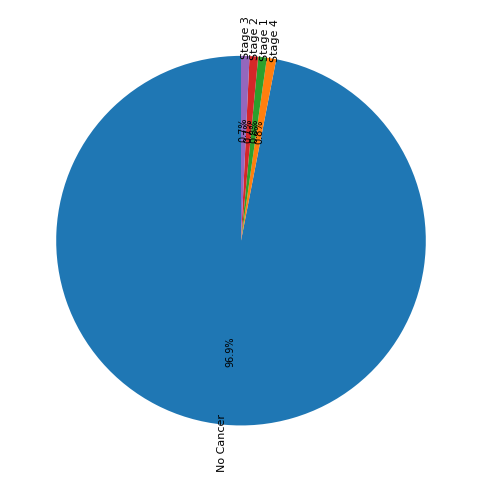

In [23]:
cancer_stage_count=df['Cancer_Stage'].value_counts()
plt.figure(figsize=(12,6))
wedges, texts, autotexts = plt.pie(cancer_stage_count.values,labels=cancer_stage_count.index,autopct='%1.1f%%', startangle=90)
for autotext in autotexts:
    autotext.set_fontsize(7)
    autotext.set_rotation(90) 
    autotext.set_ha('center')  
    autotext.set_va('center')  

for text in texts:
    text.set_fontsize(8)
    text.set_rotation(90) 
    text.set_ha('center')
    text.set_va('center')
plt.show()   

In [24]:
df['Treatment_Type'].value_counts()

Treatment_Type
No Cancer       211419
Surgery           2272
Radiotherapy      2250
Chemotherapy      2142
Name: count, dtype: int64

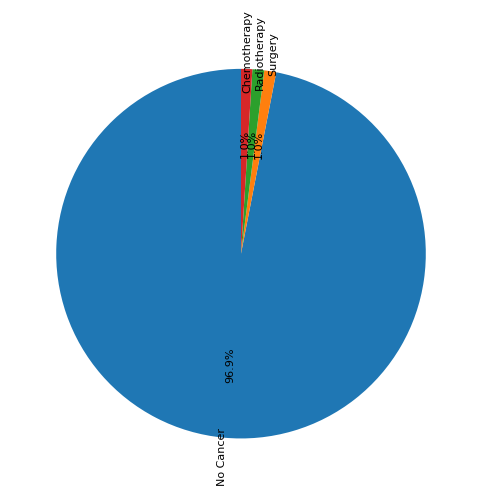

In [25]:
treatment_type_count=df['Treatment_Type'].value_counts()
plt.figure(figsize=(12,6))
wedges, texts, autotexts = plt.pie(treatment_type_count.values,labels=treatment_type_count.index,autopct='%1.1f%%', startangle=90)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_rotation(90) 
    autotext.set_ha('center')  
    autotext.set_va('center')  

for text in texts:
    text.set_fontsize(8)
    text.set_rotation(90) 
    text.set_ha('center')
    text.set_va('center')
plt.show()   

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Country', 'Gender', 'Smoker', 'Passive_Smoker', 'Family_History',
       'Lung_Cancer_Diagnosis', 'Cancer_Stage', 'Adenocarcinoma_Type',
       'Air_Pollution_Exposure', 'Occupational_Exposure', 'Indoor_Pollution',
       'Healthcare_Access', 'Early_Detection', 'Treatment_Type',
       'Developed_or_Developing'],
      dtype='object')

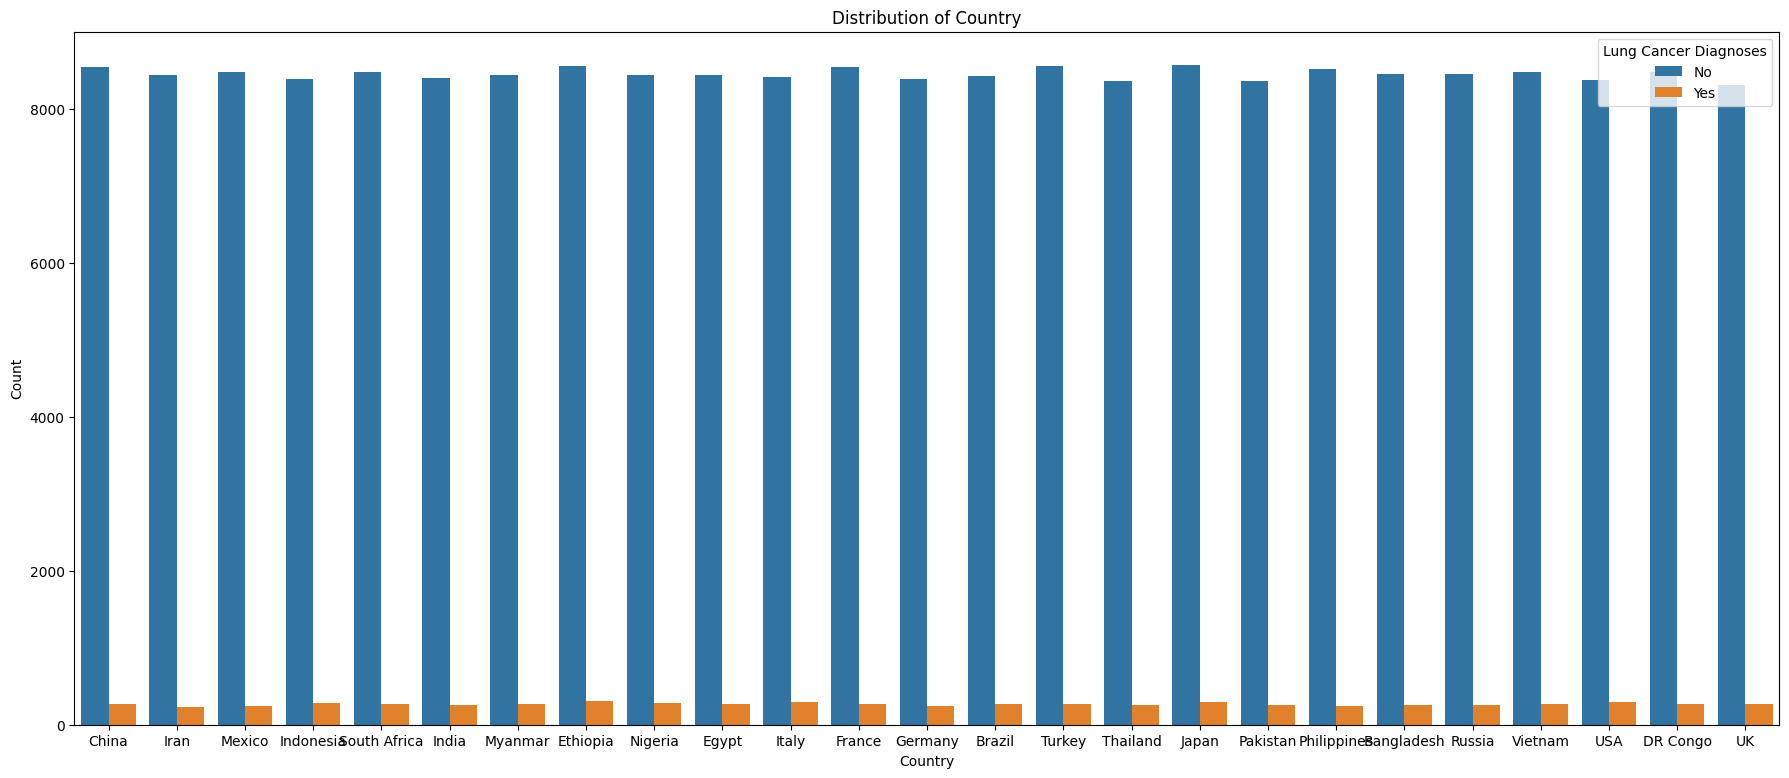

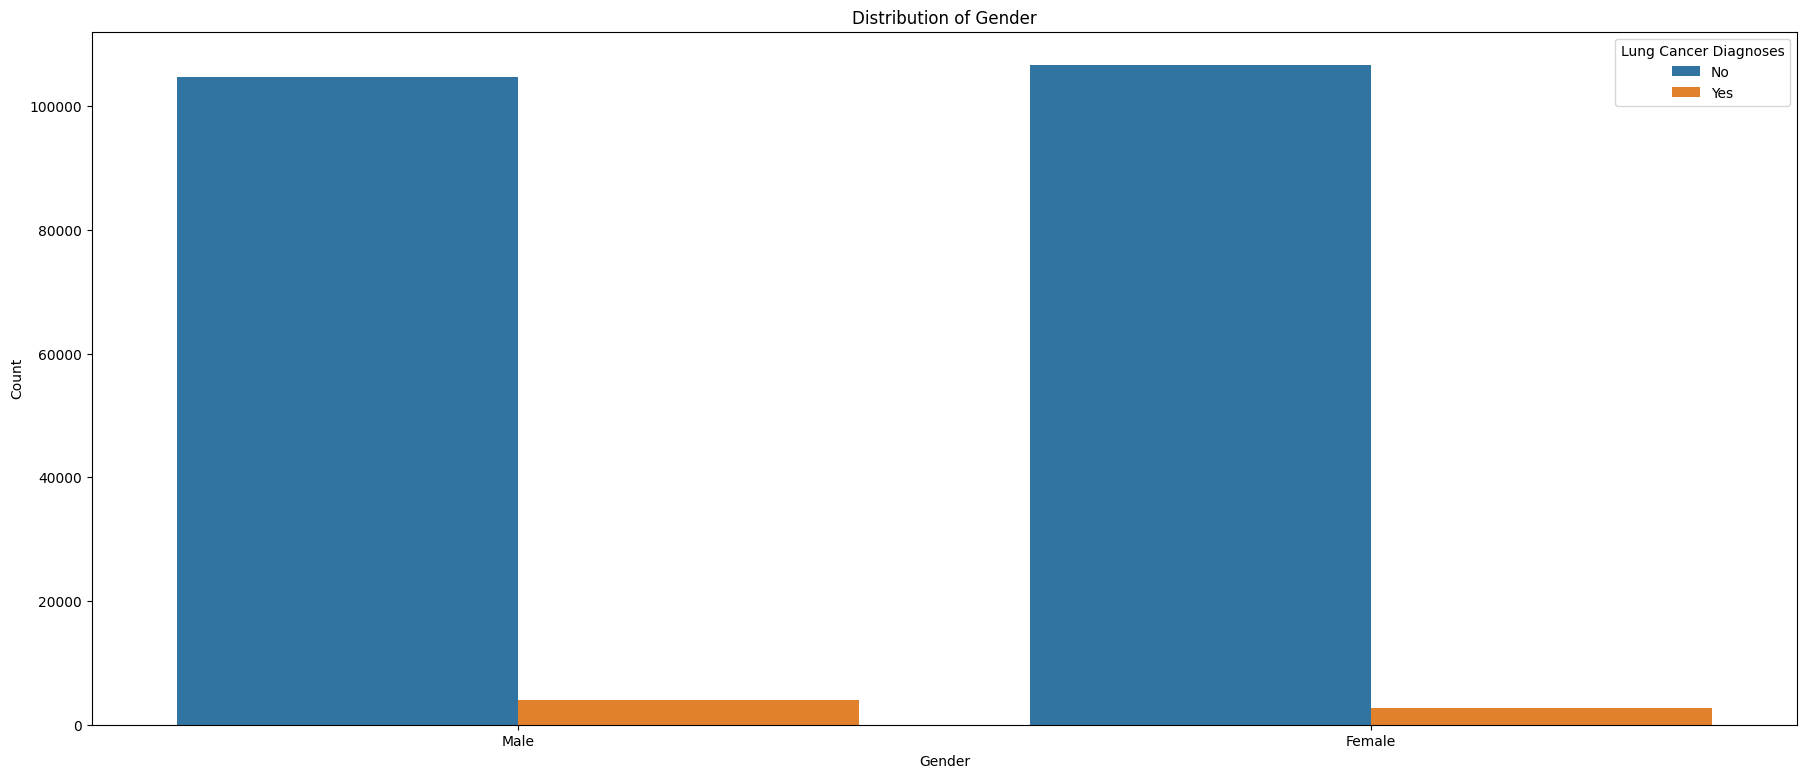

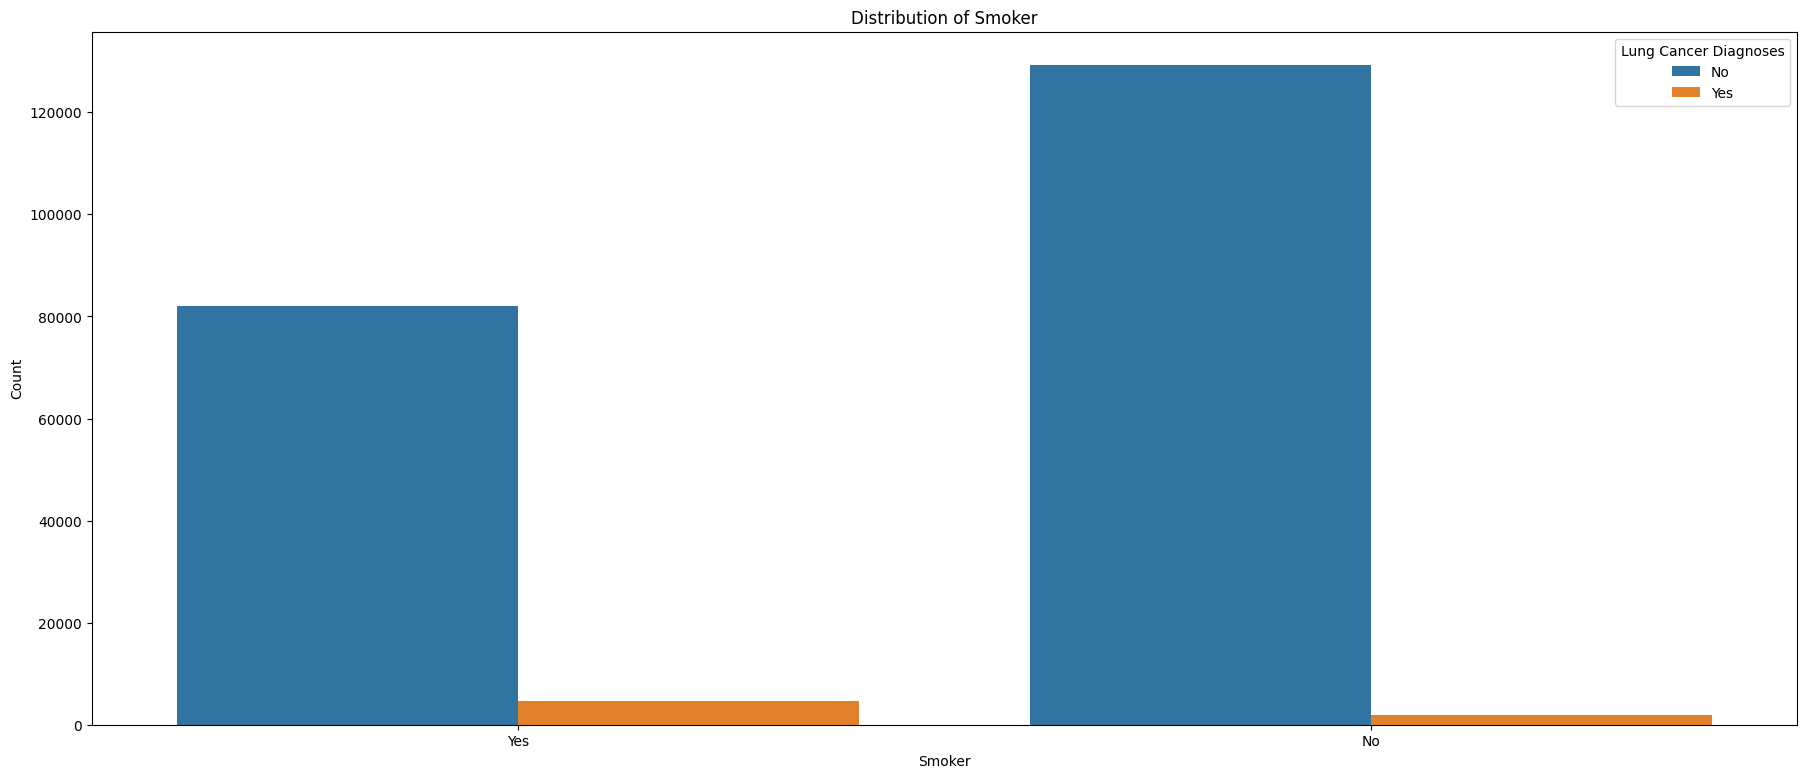

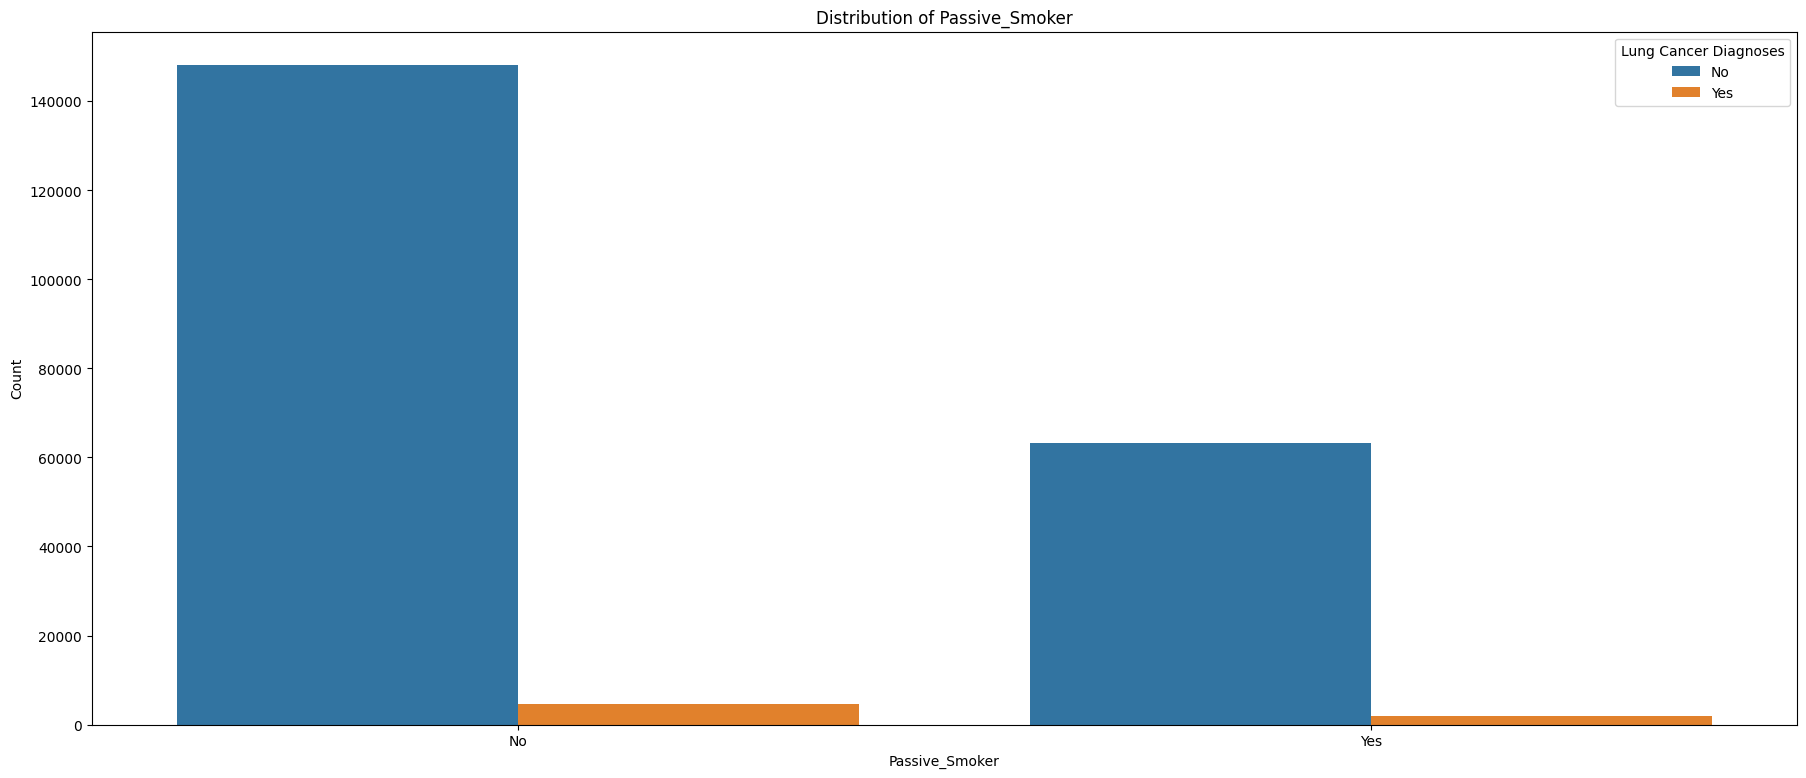

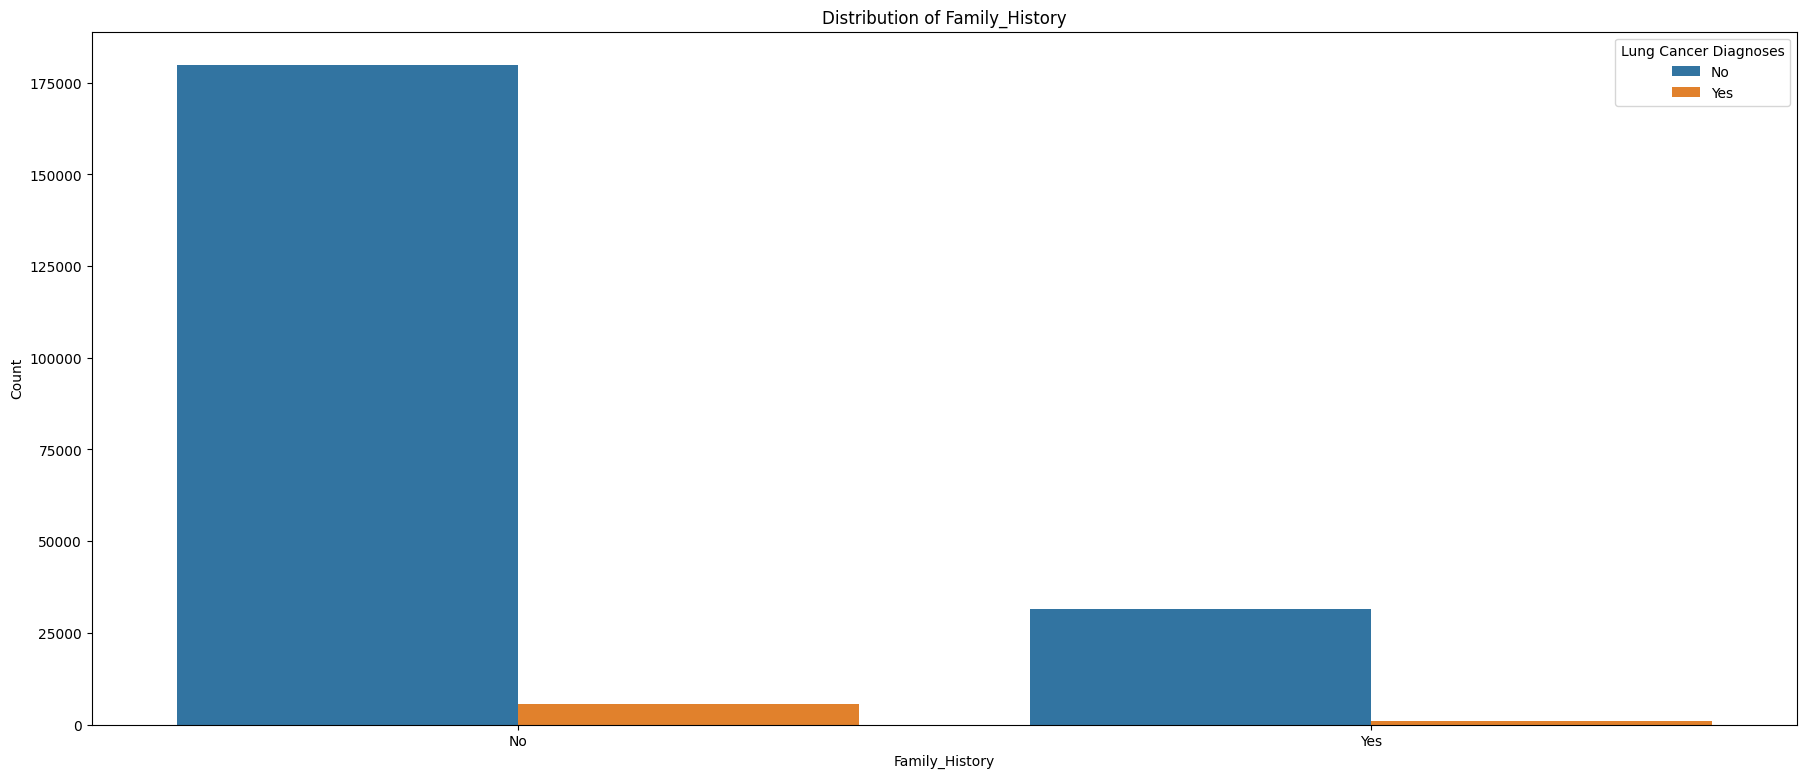

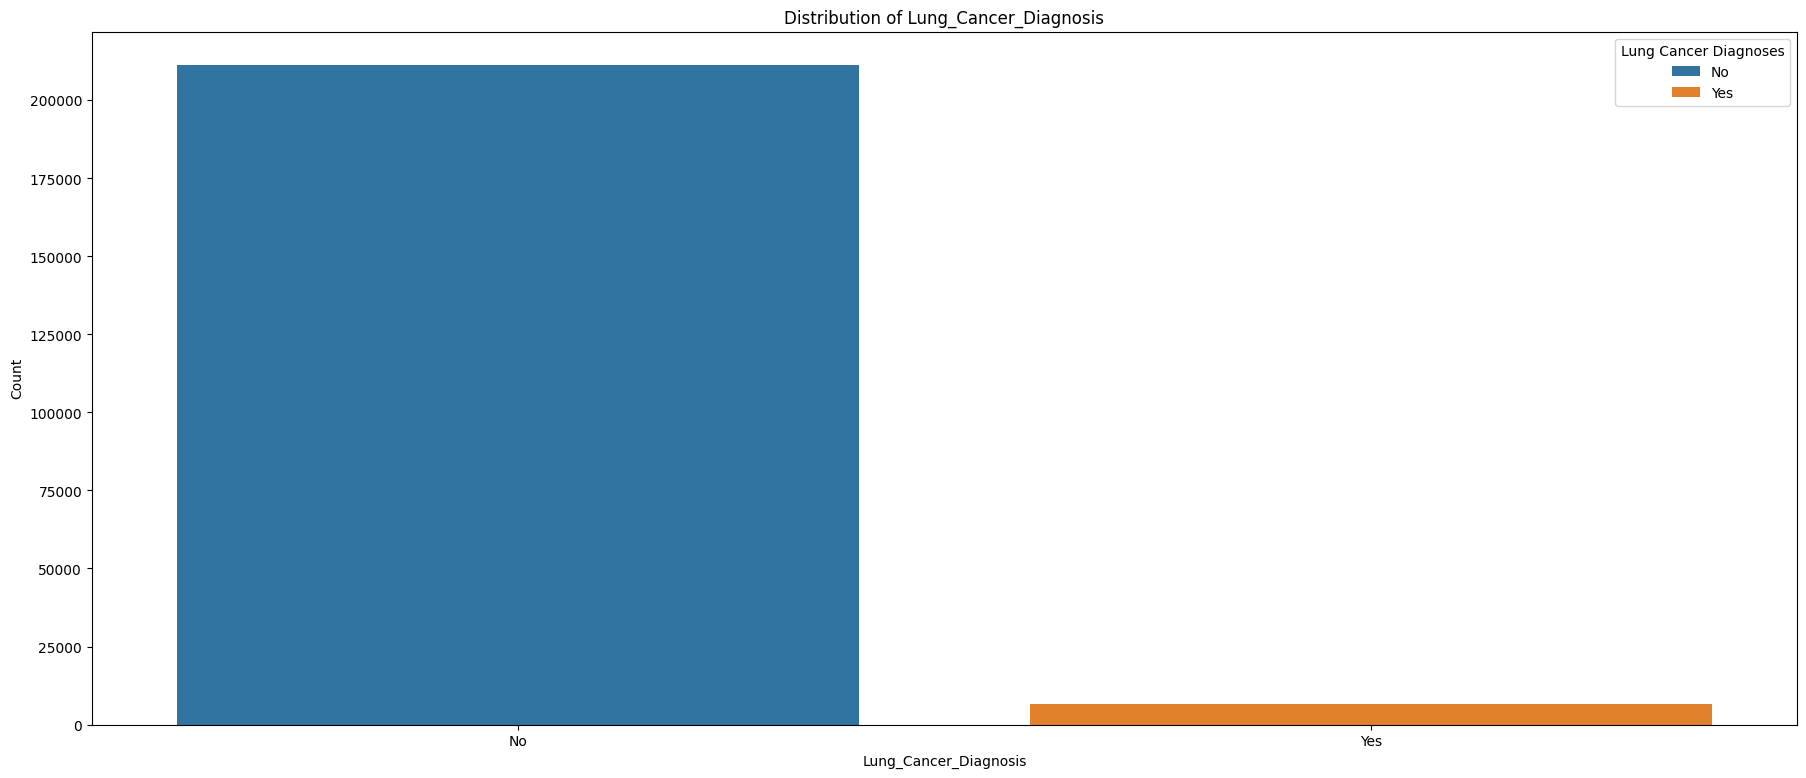

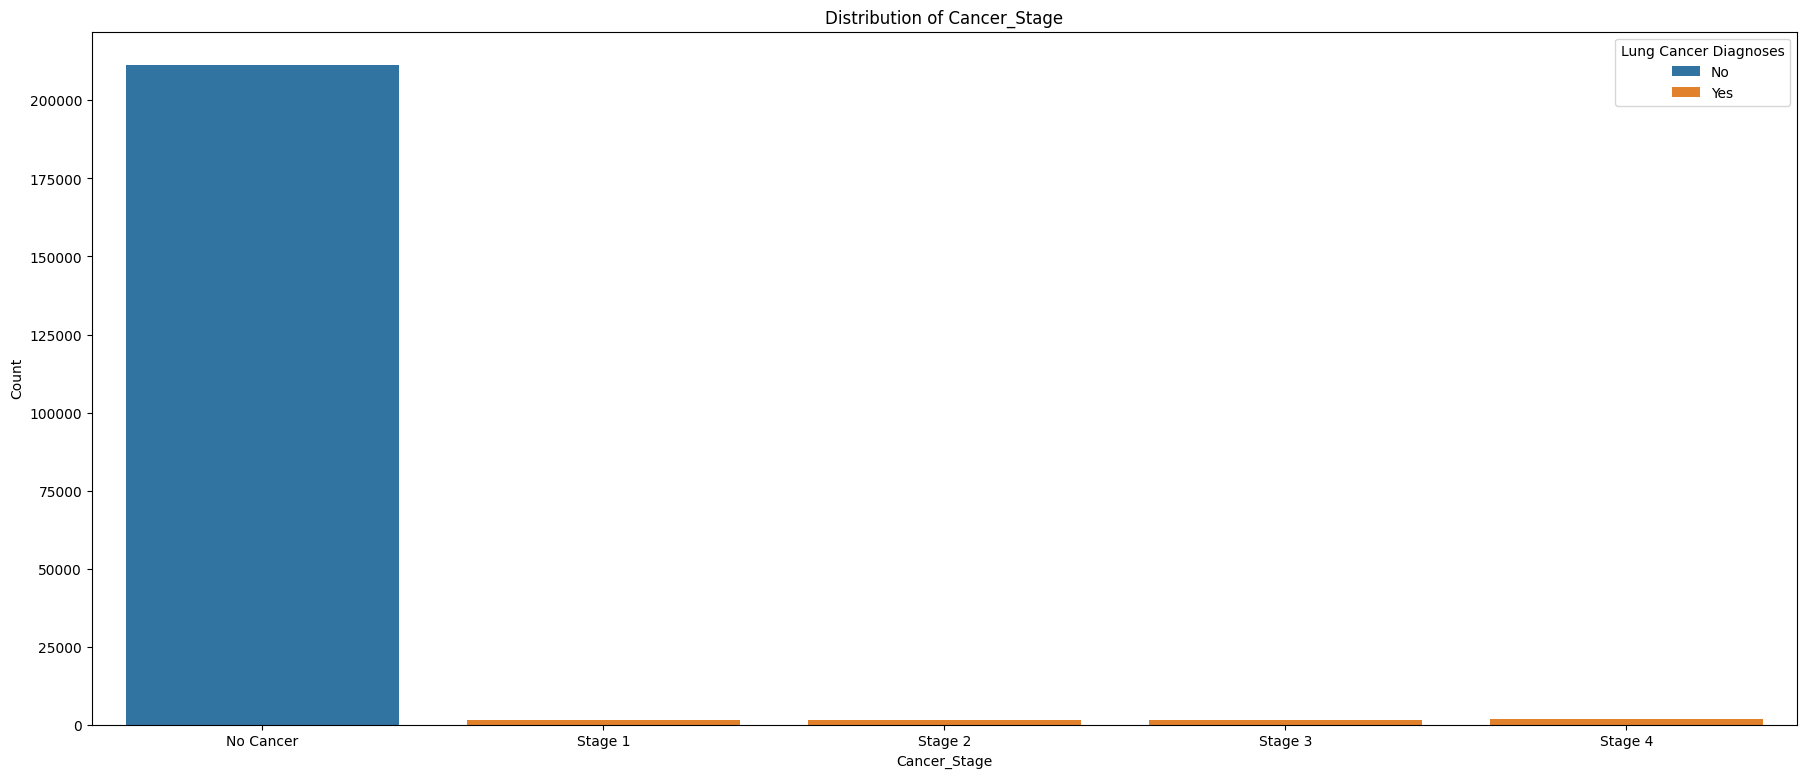

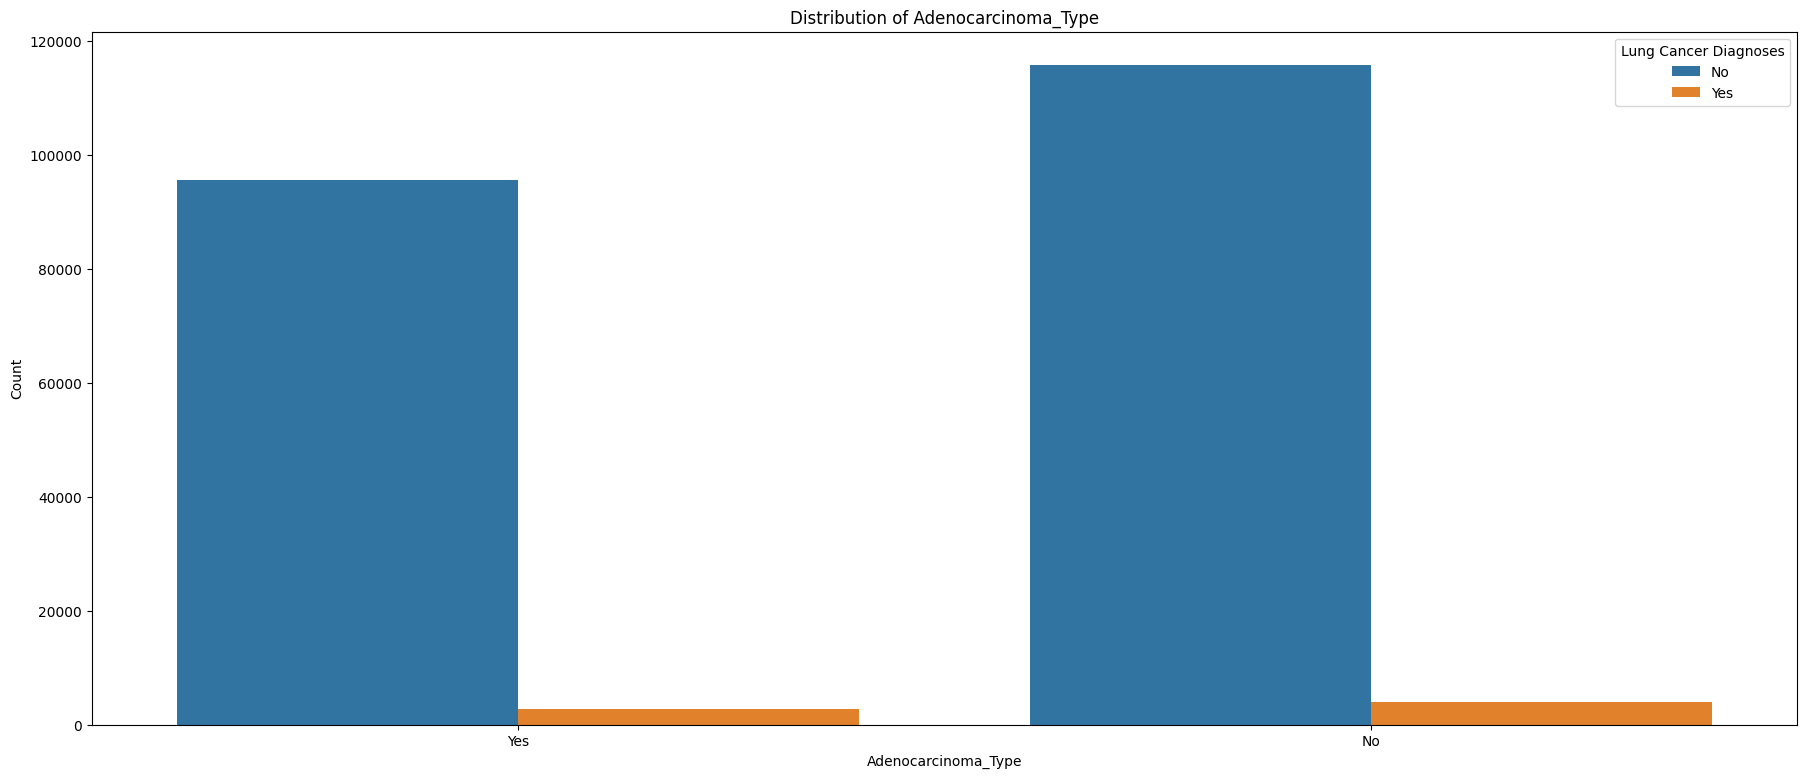

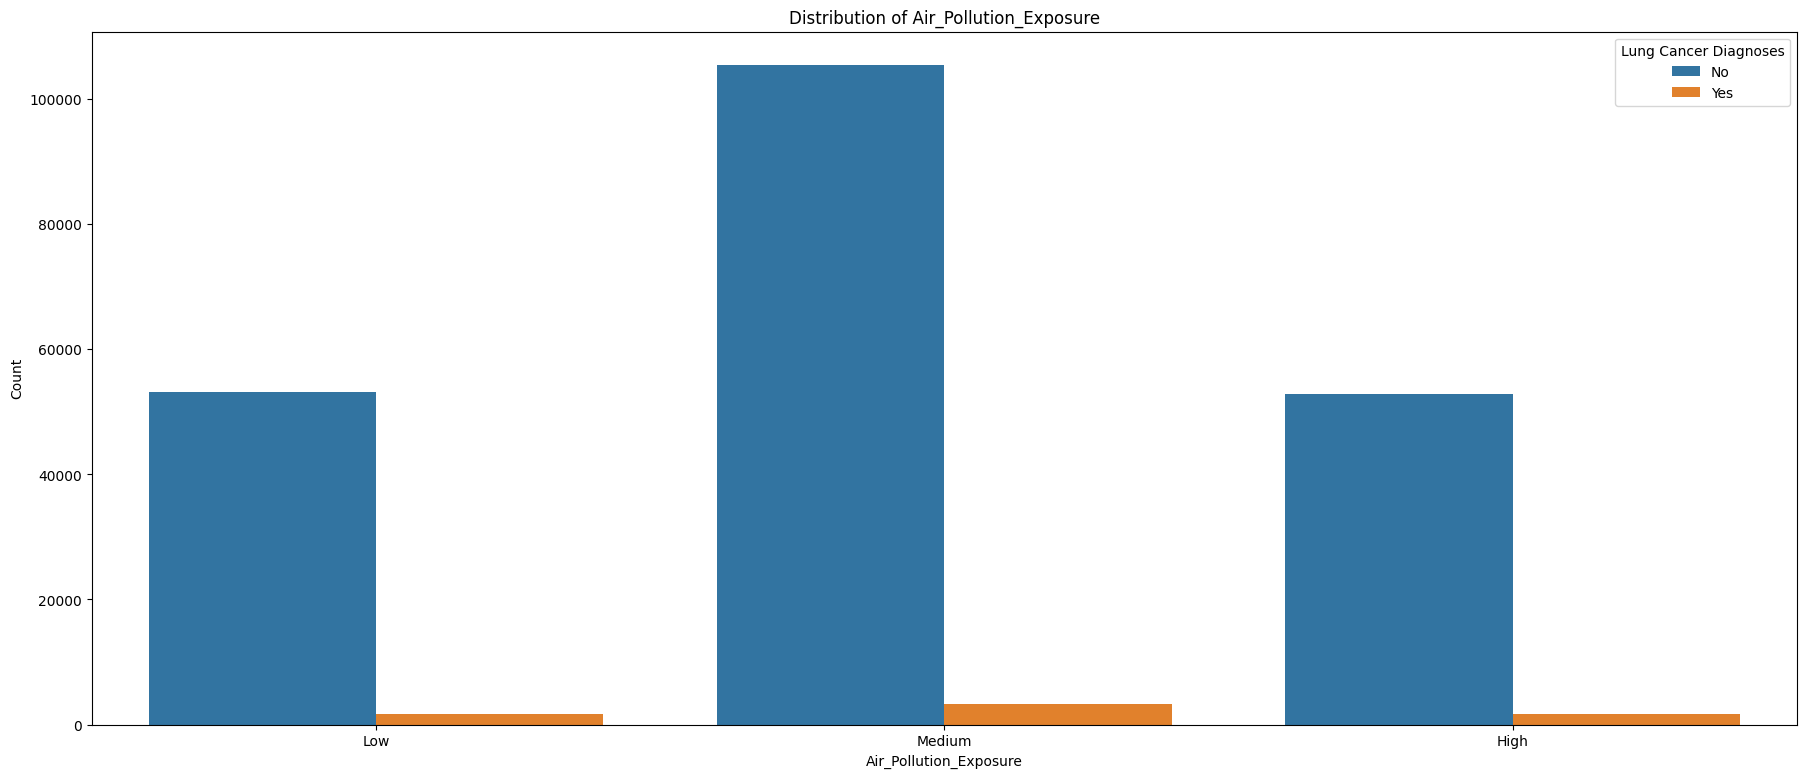

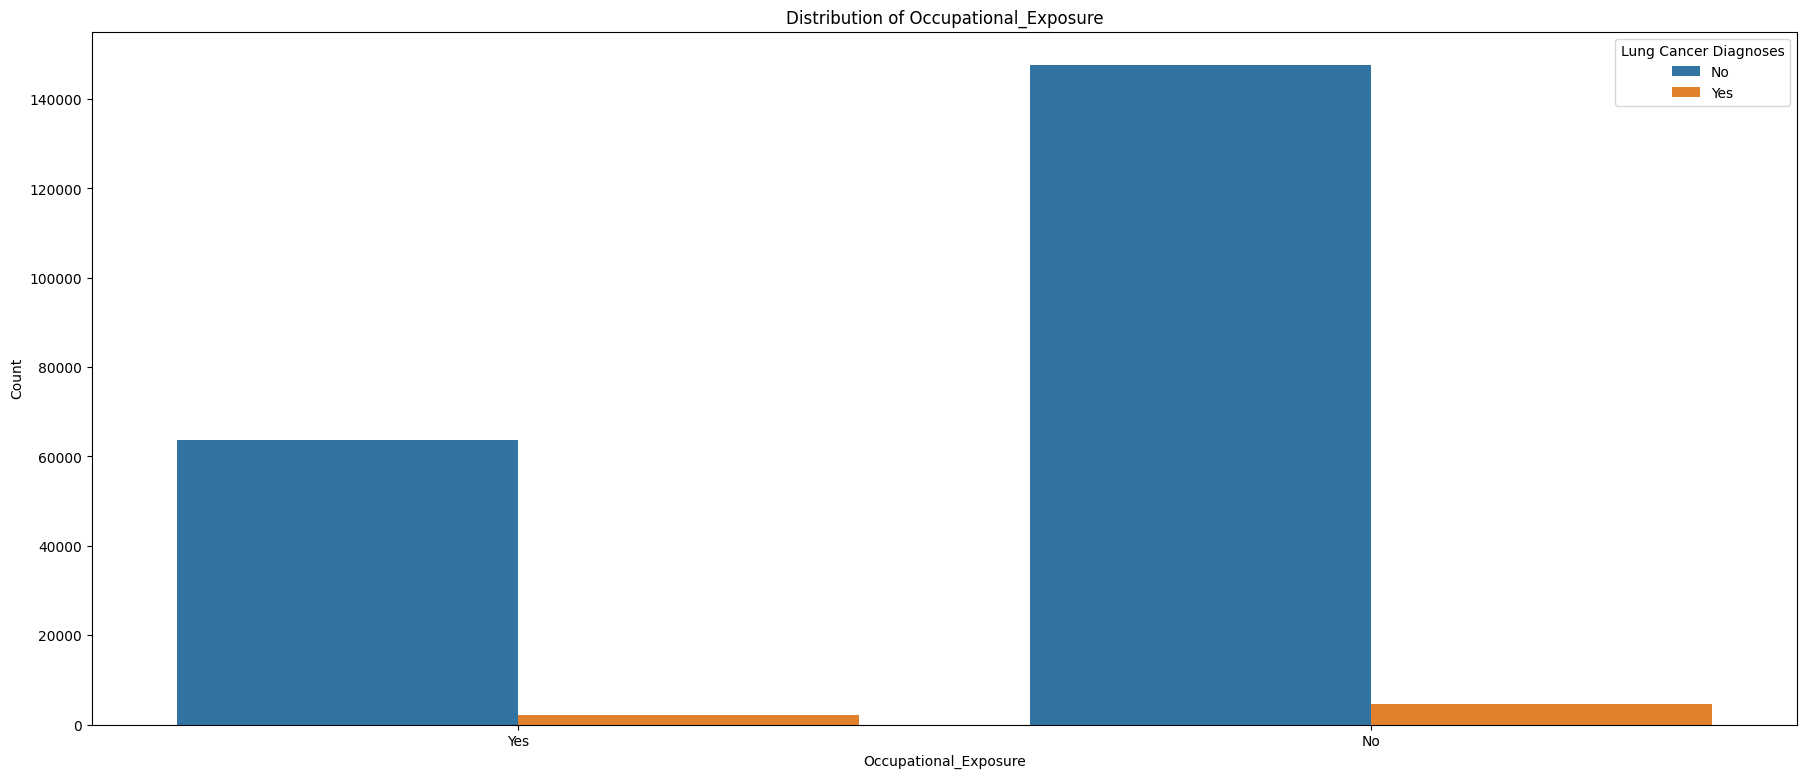

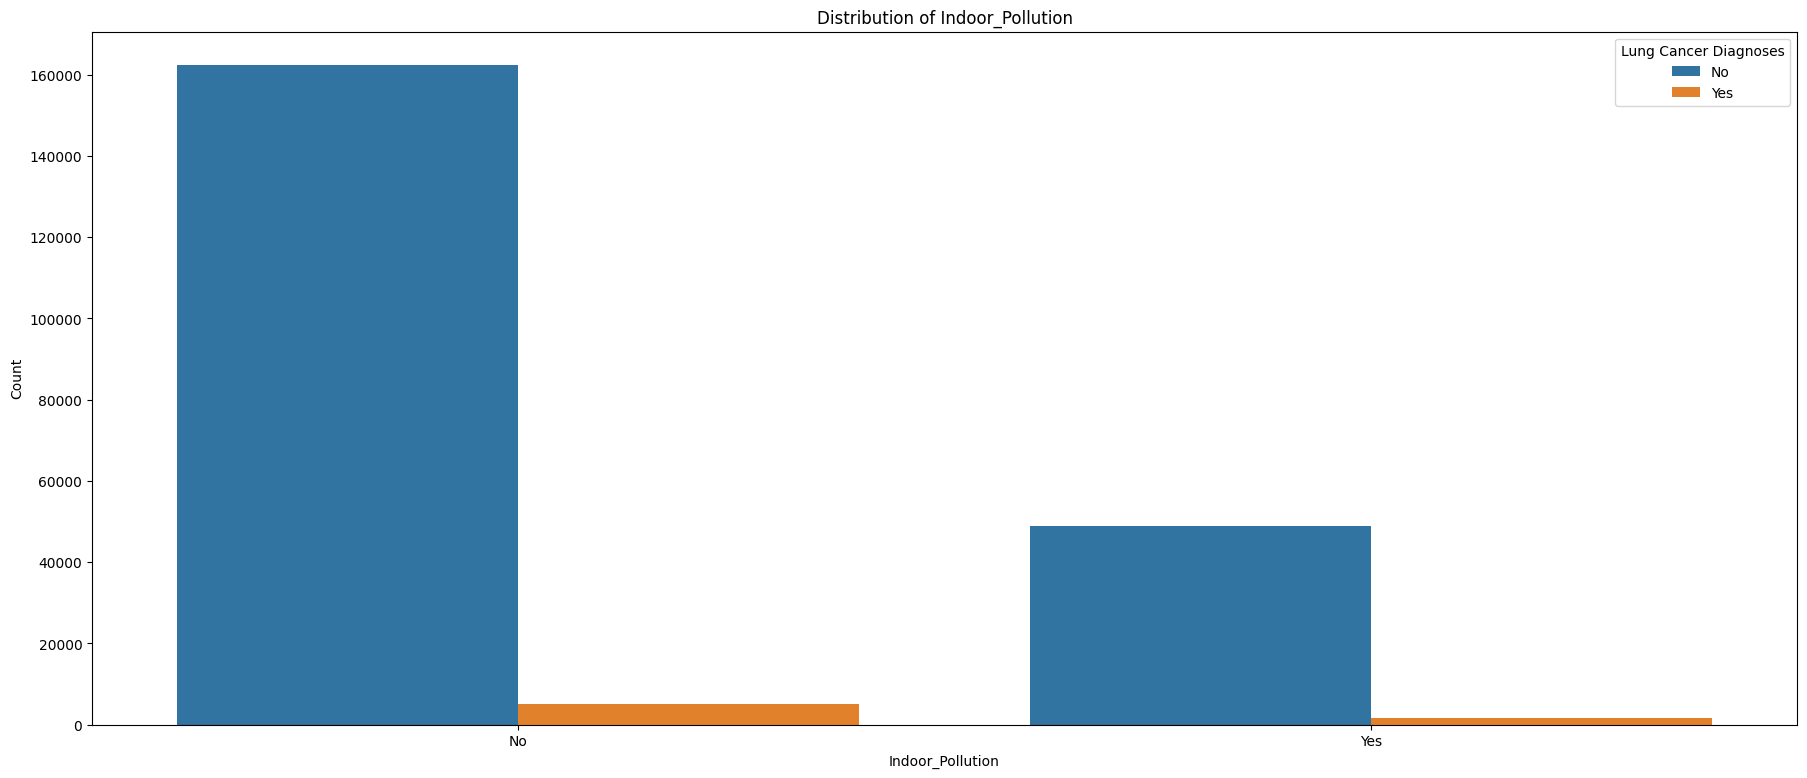

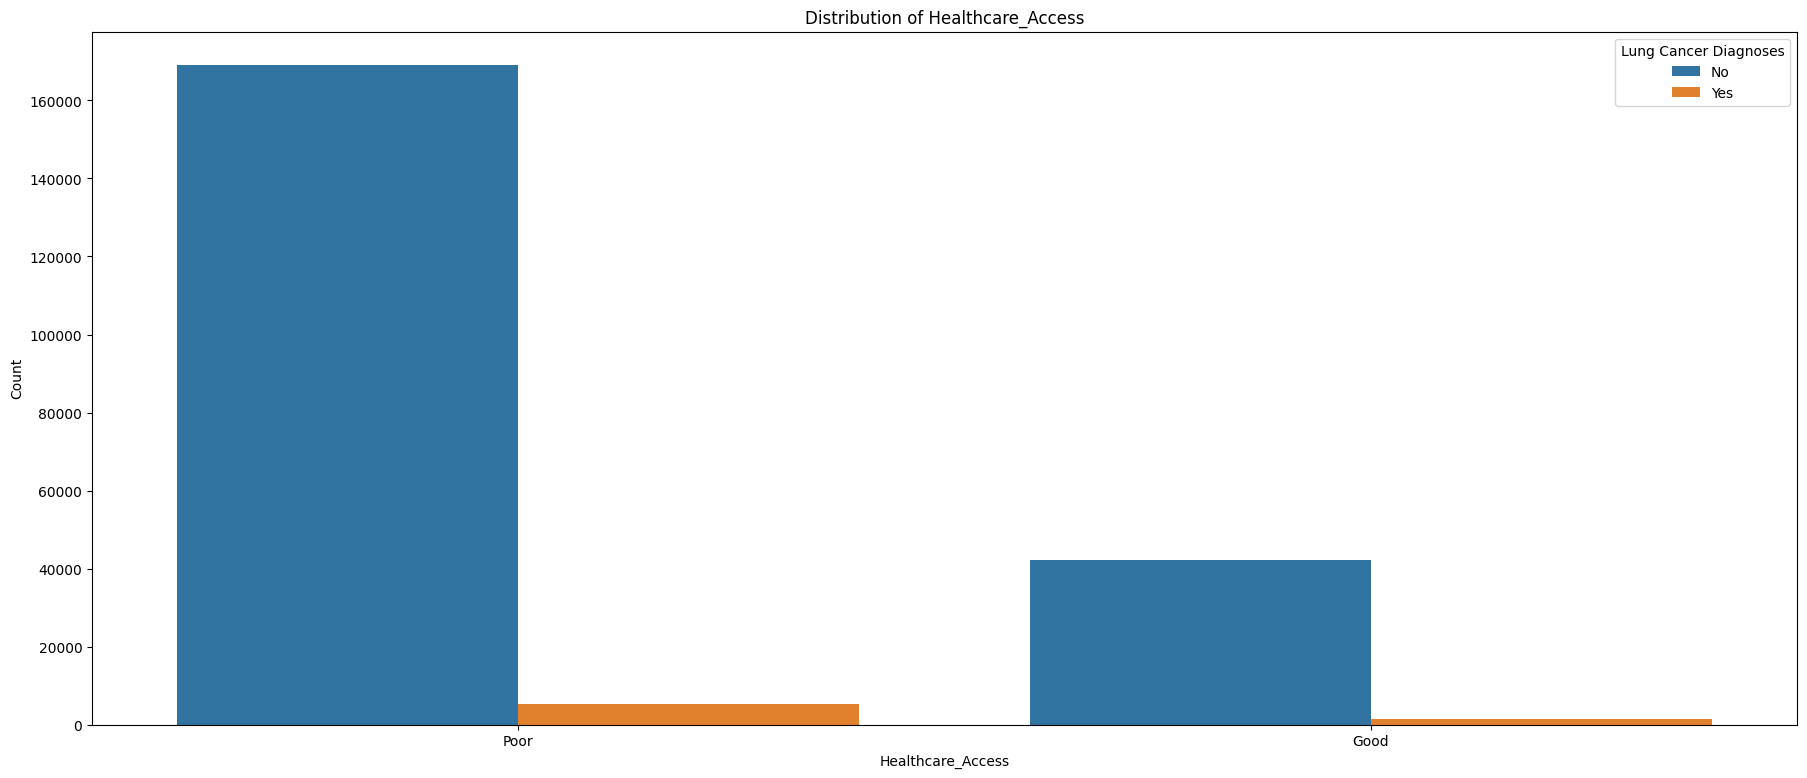

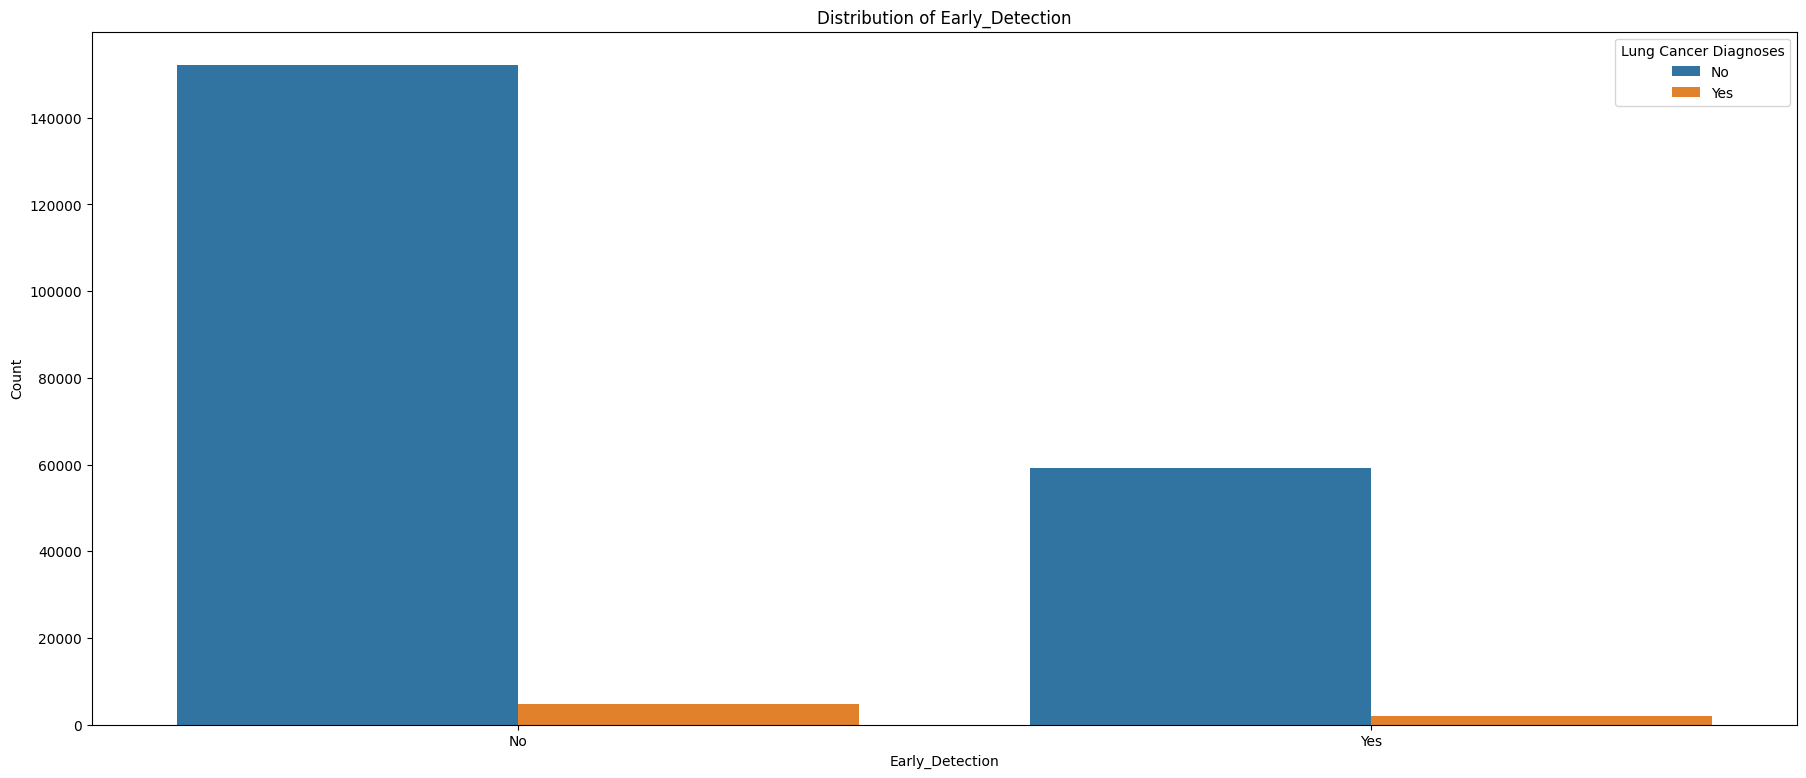

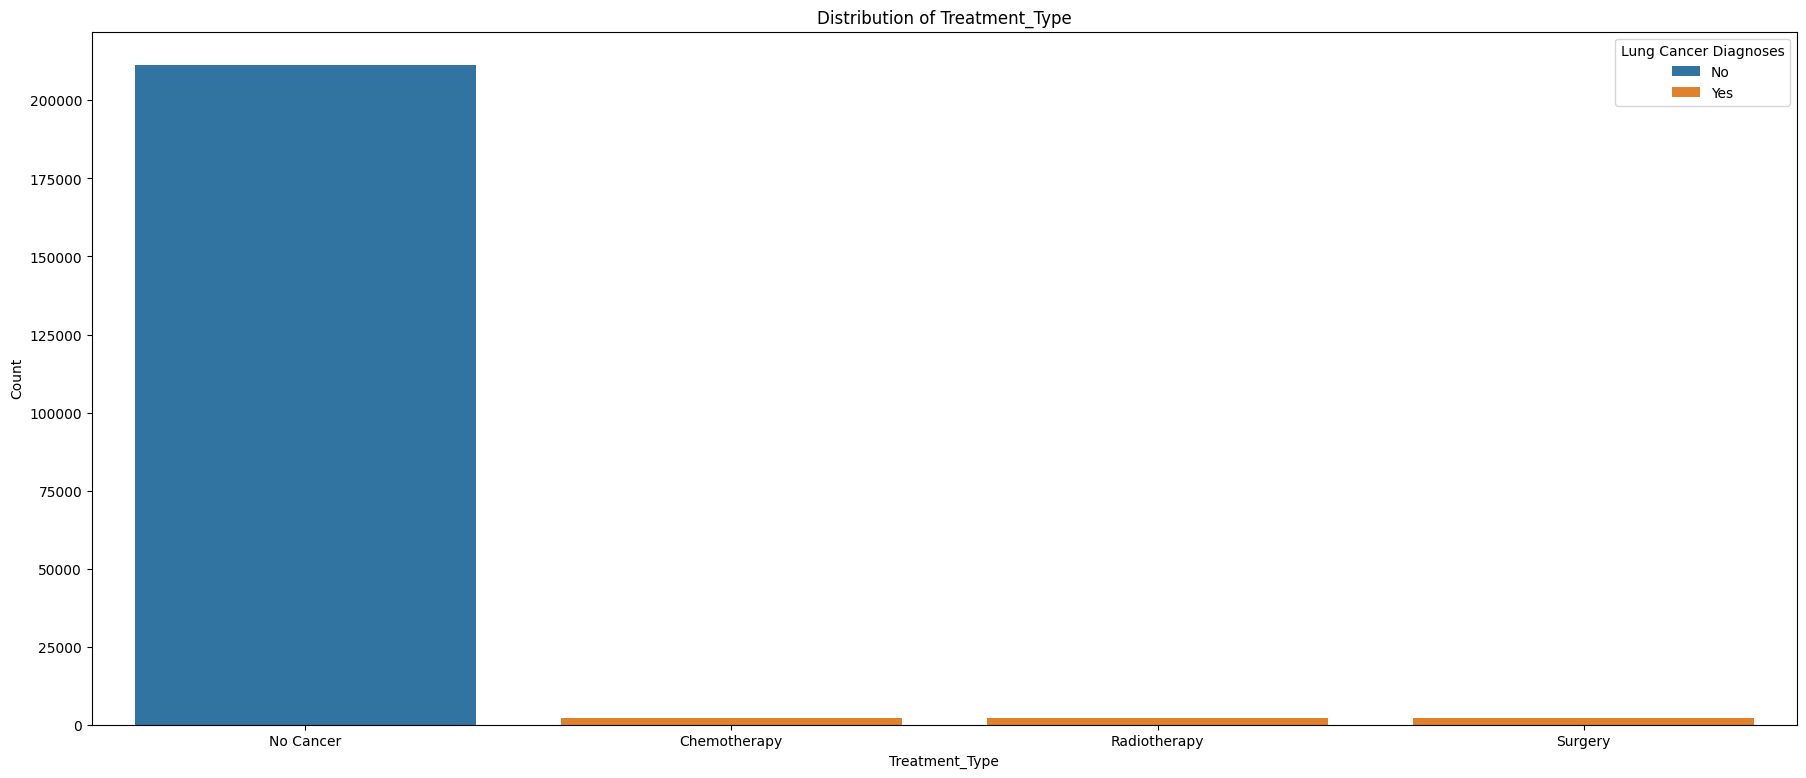

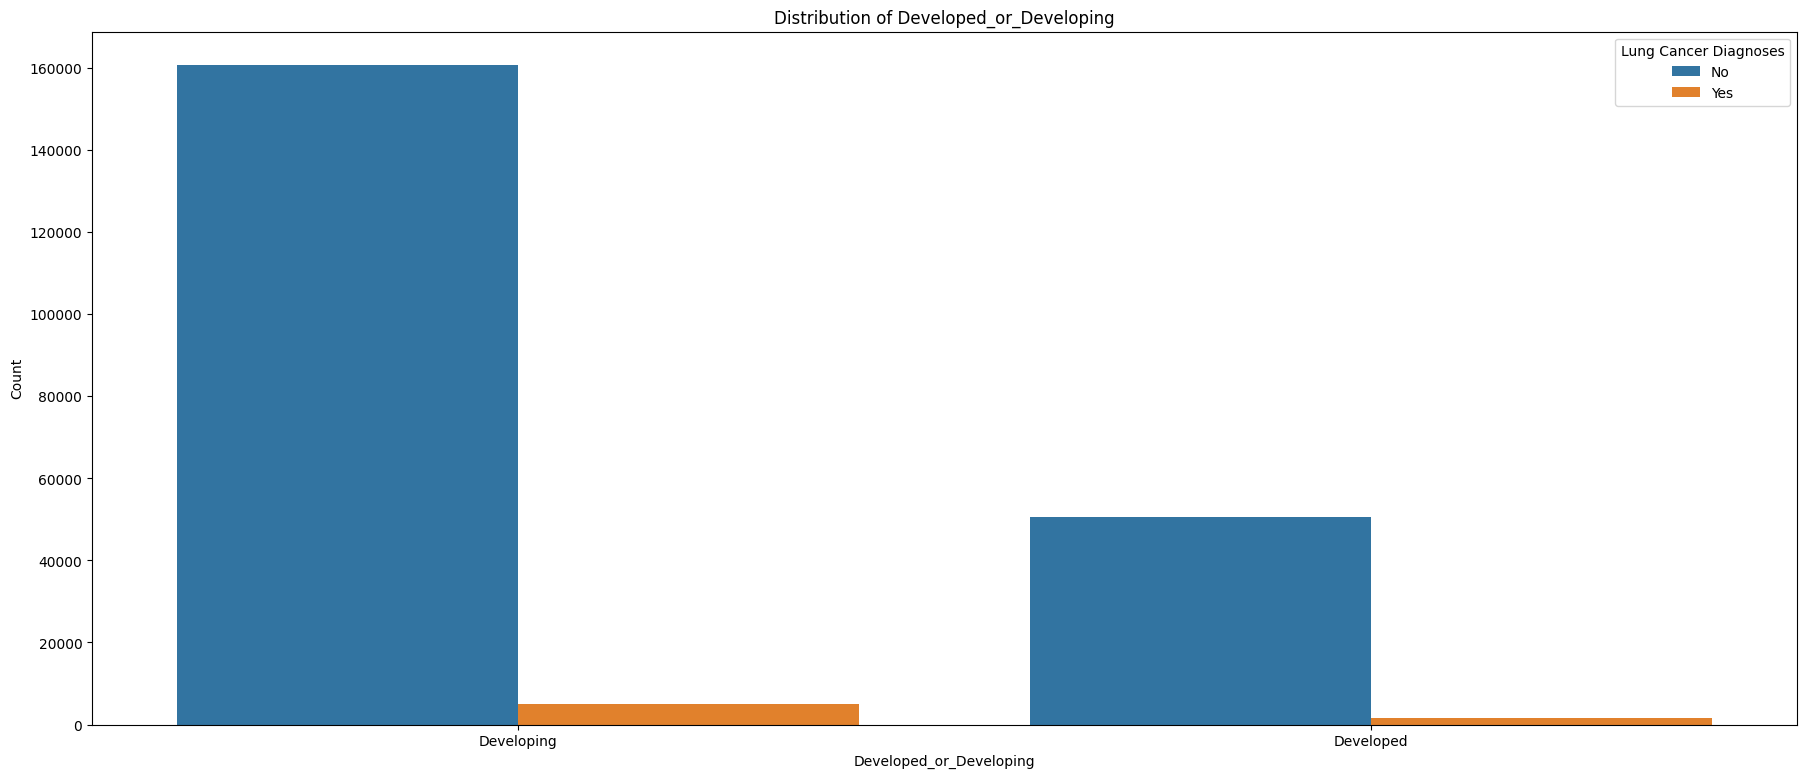

In [27]:
for col in cat_cols:
    plt.figure(figsize=(22,9))
    sns.countplot(data=df,x=col,hue='Lung_Cancer_Diagnosis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.legend(title='Lung Cancer Diagnoses', labels=['No', 'Yes'], loc='upper right')
    plt.show()
    print('\n')

In [28]:
num_cols=df.select_dtypes(include=['number']).columns
num_cols

Index(['Population_Size', 'Age', 'Years_of_Smoking', 'Cigarettes_per_Day',
       'Survival_Years', 'Annual_Lung_Cancer_Deaths',
       'Lung_Cancer_Prevalence_Rate', 'Mortality_Rate'],
      dtype='object')

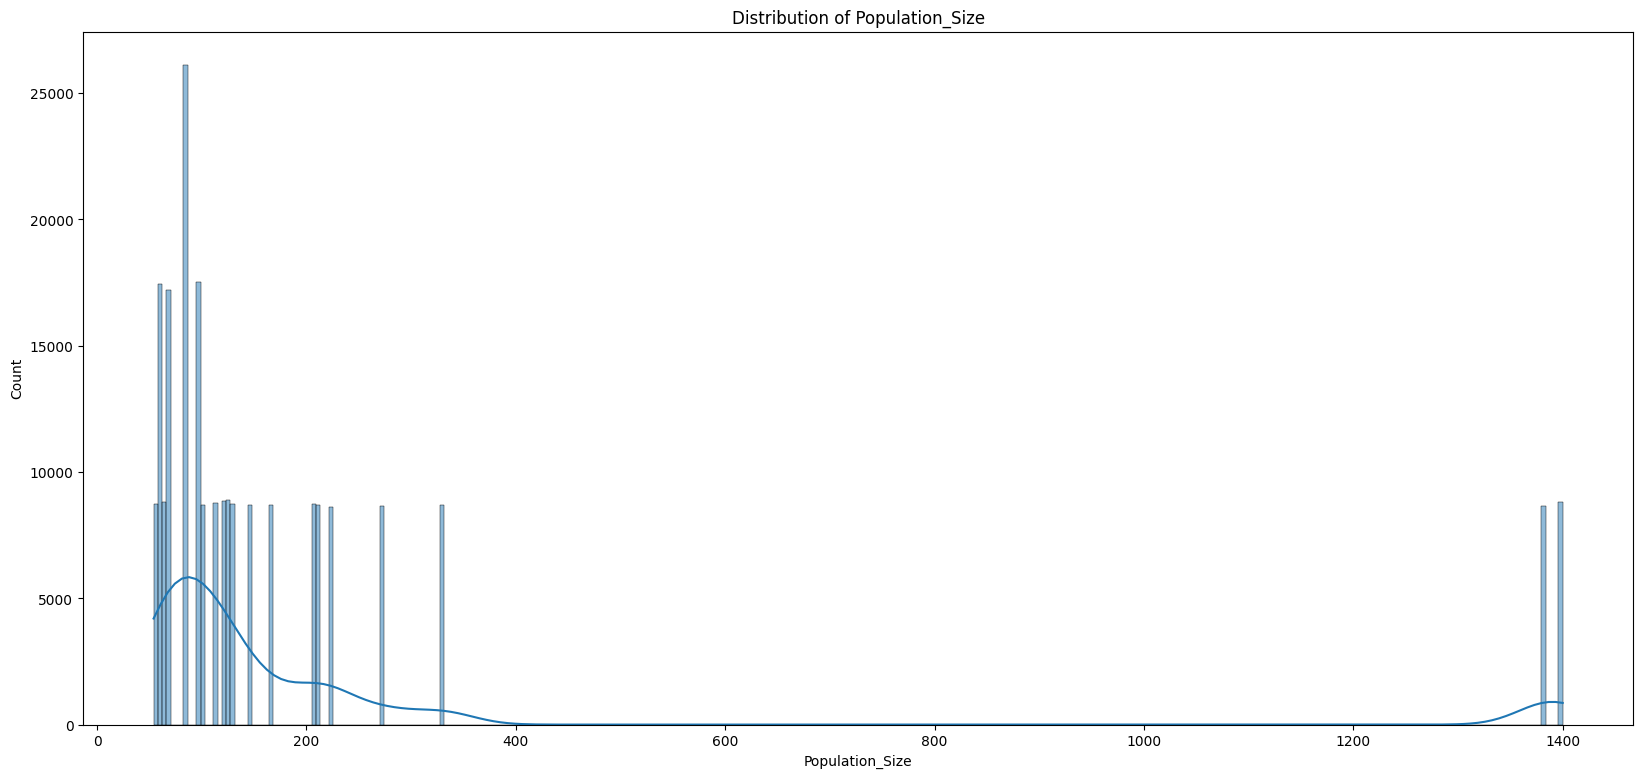

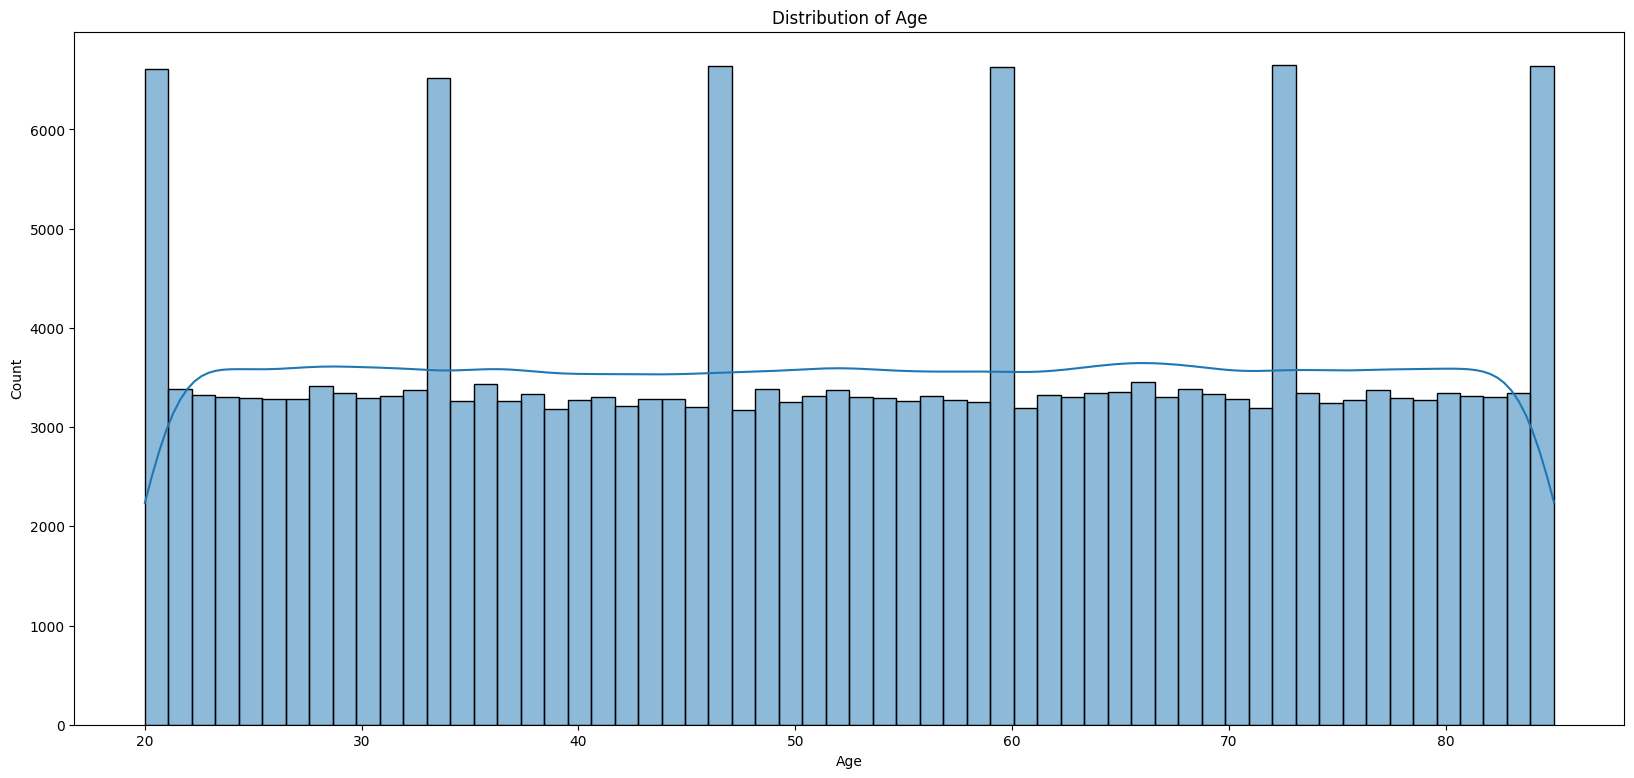

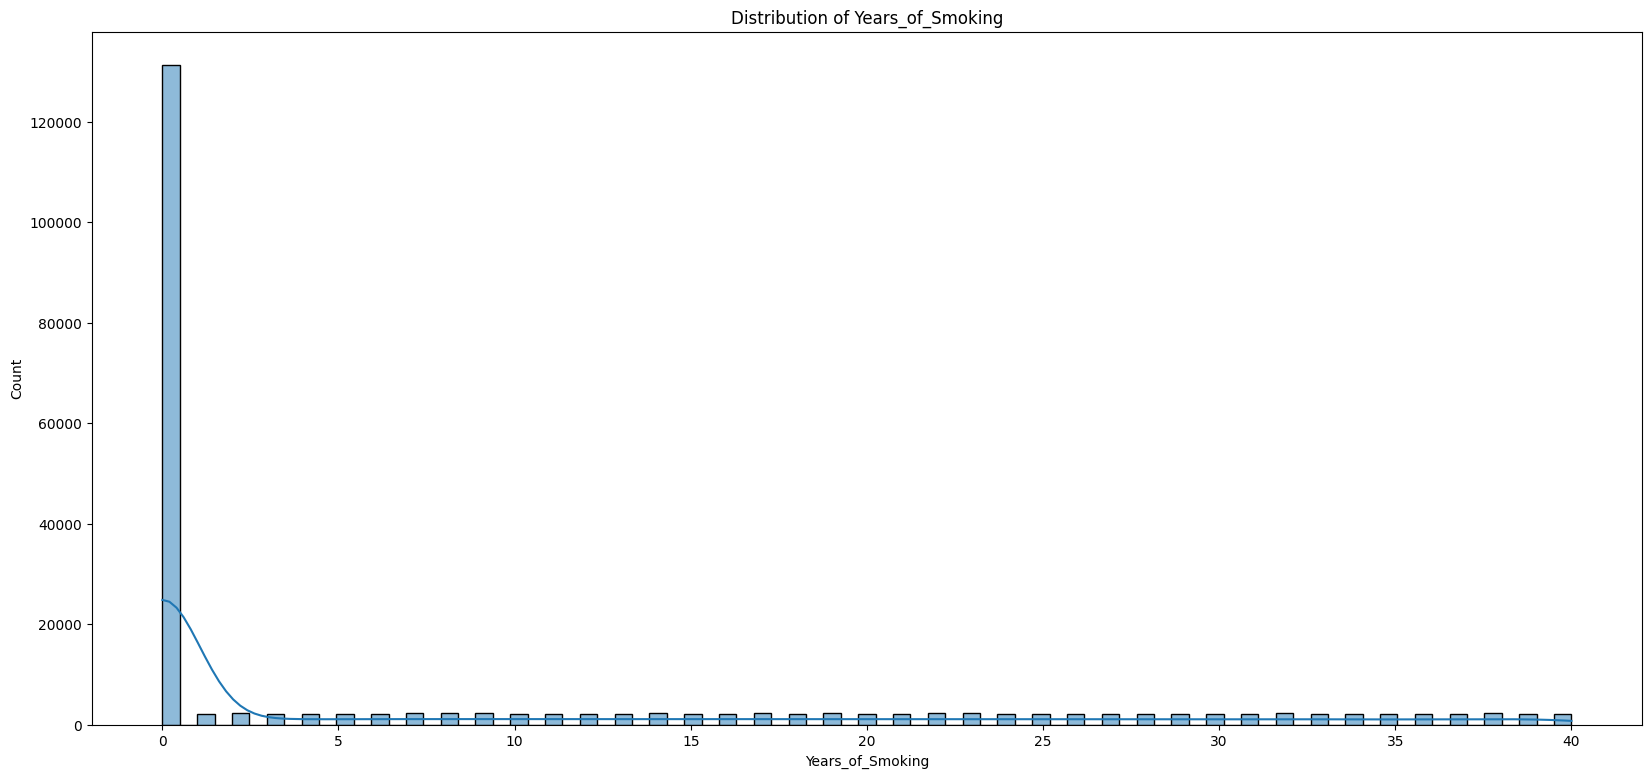

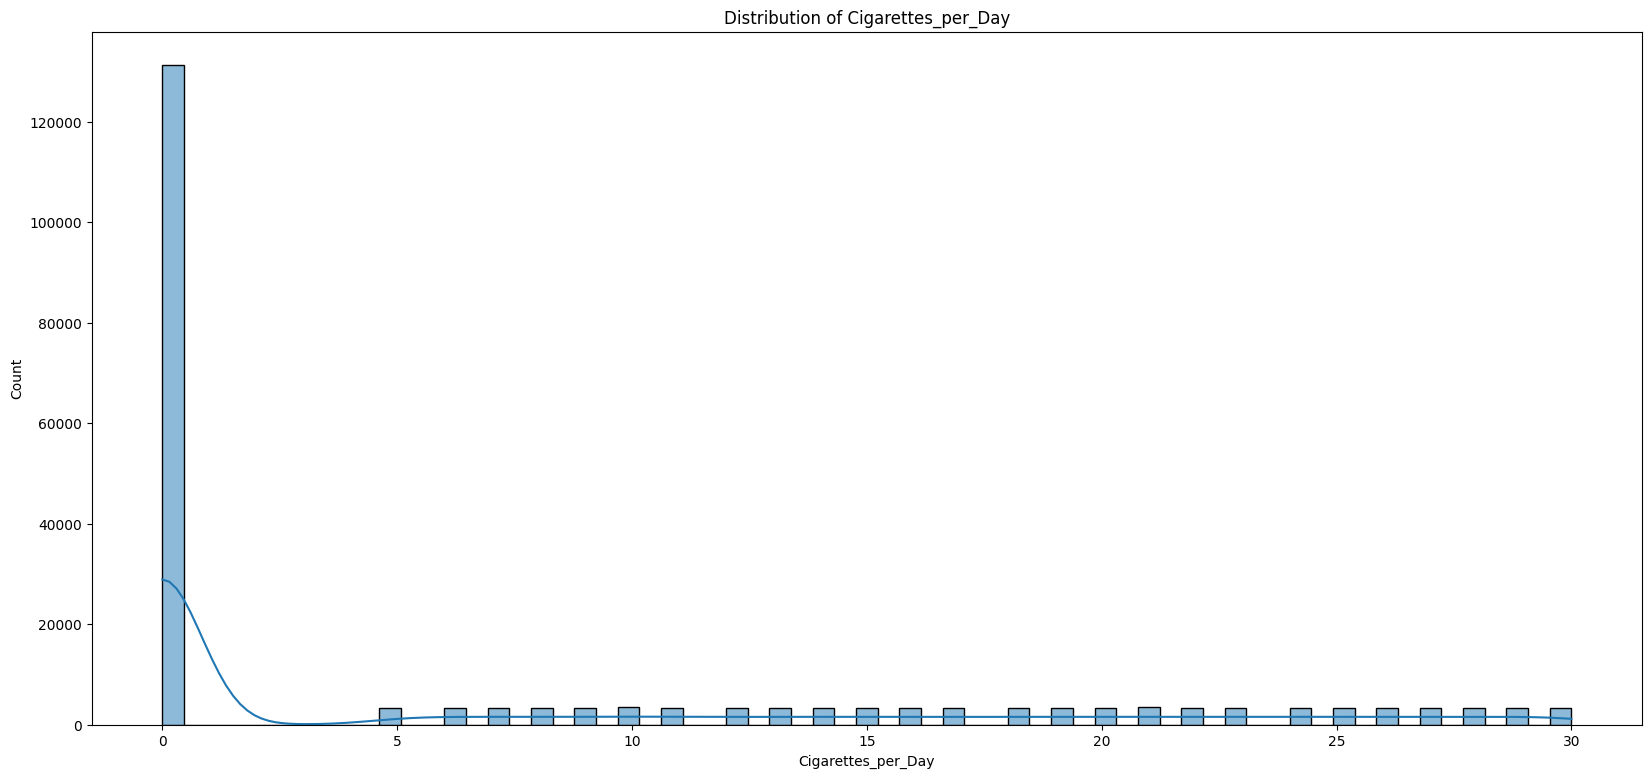

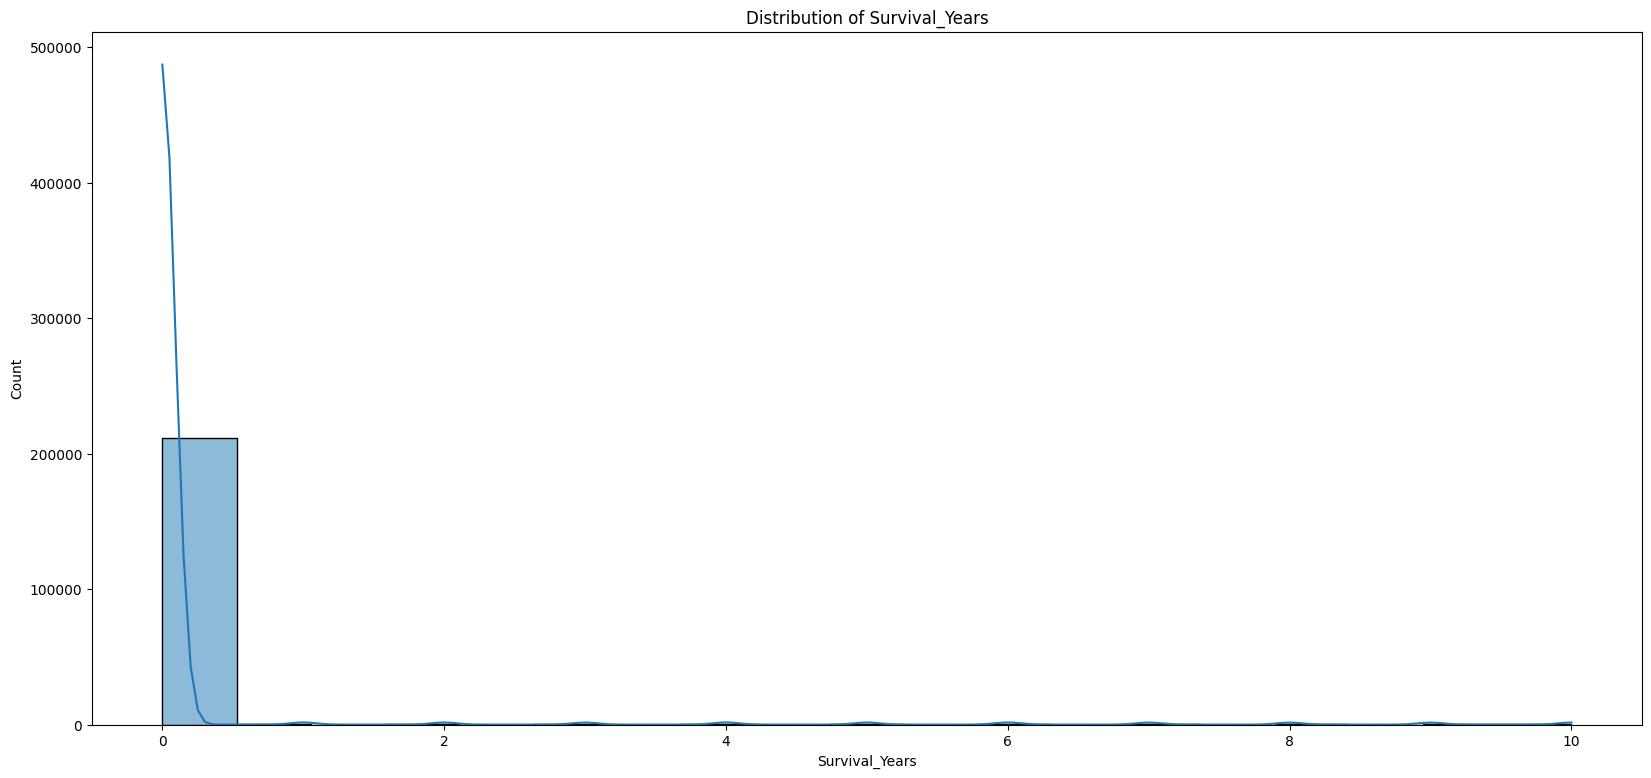

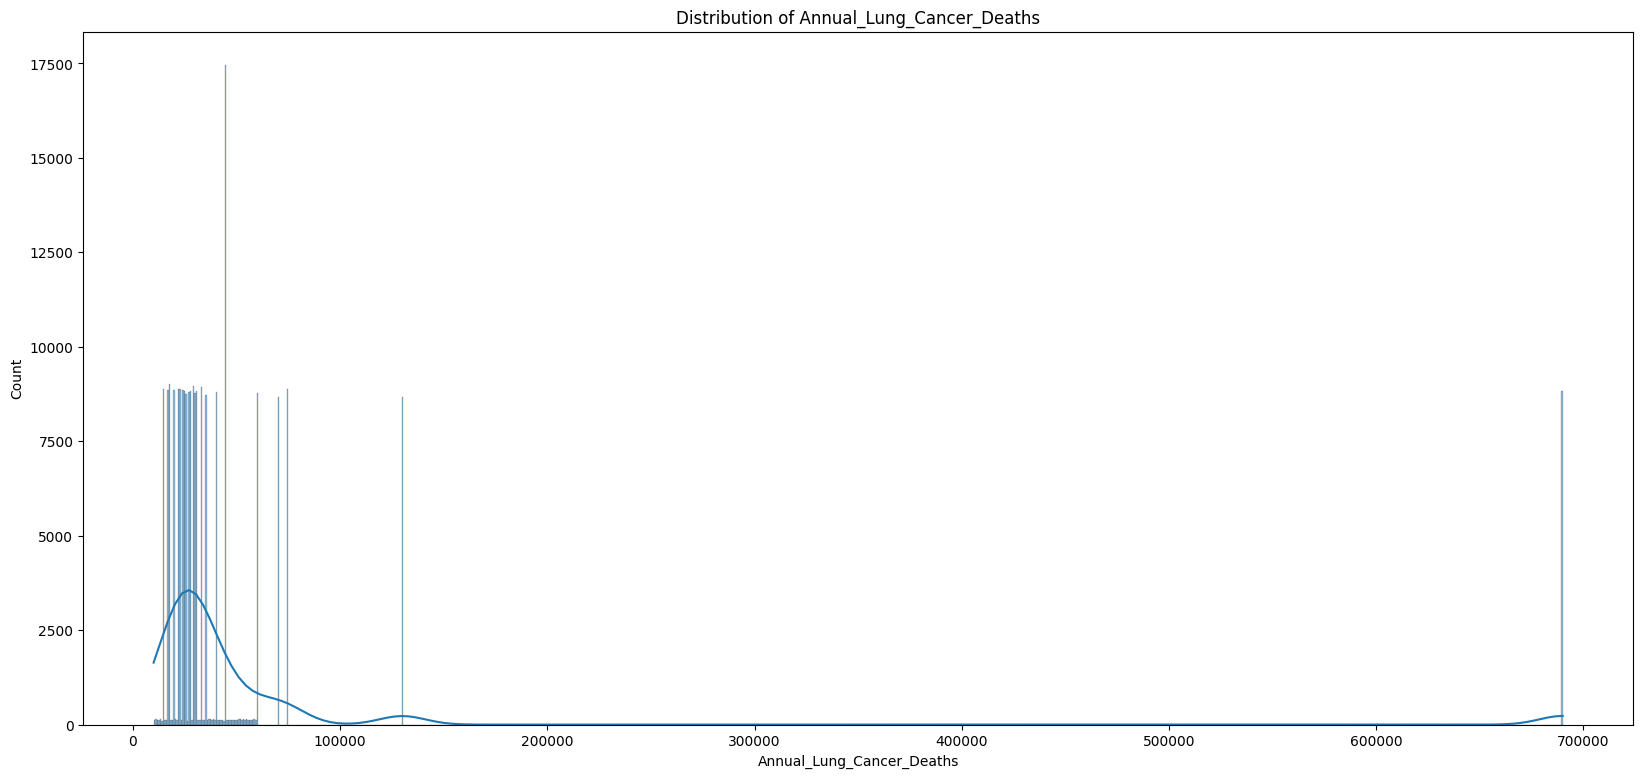

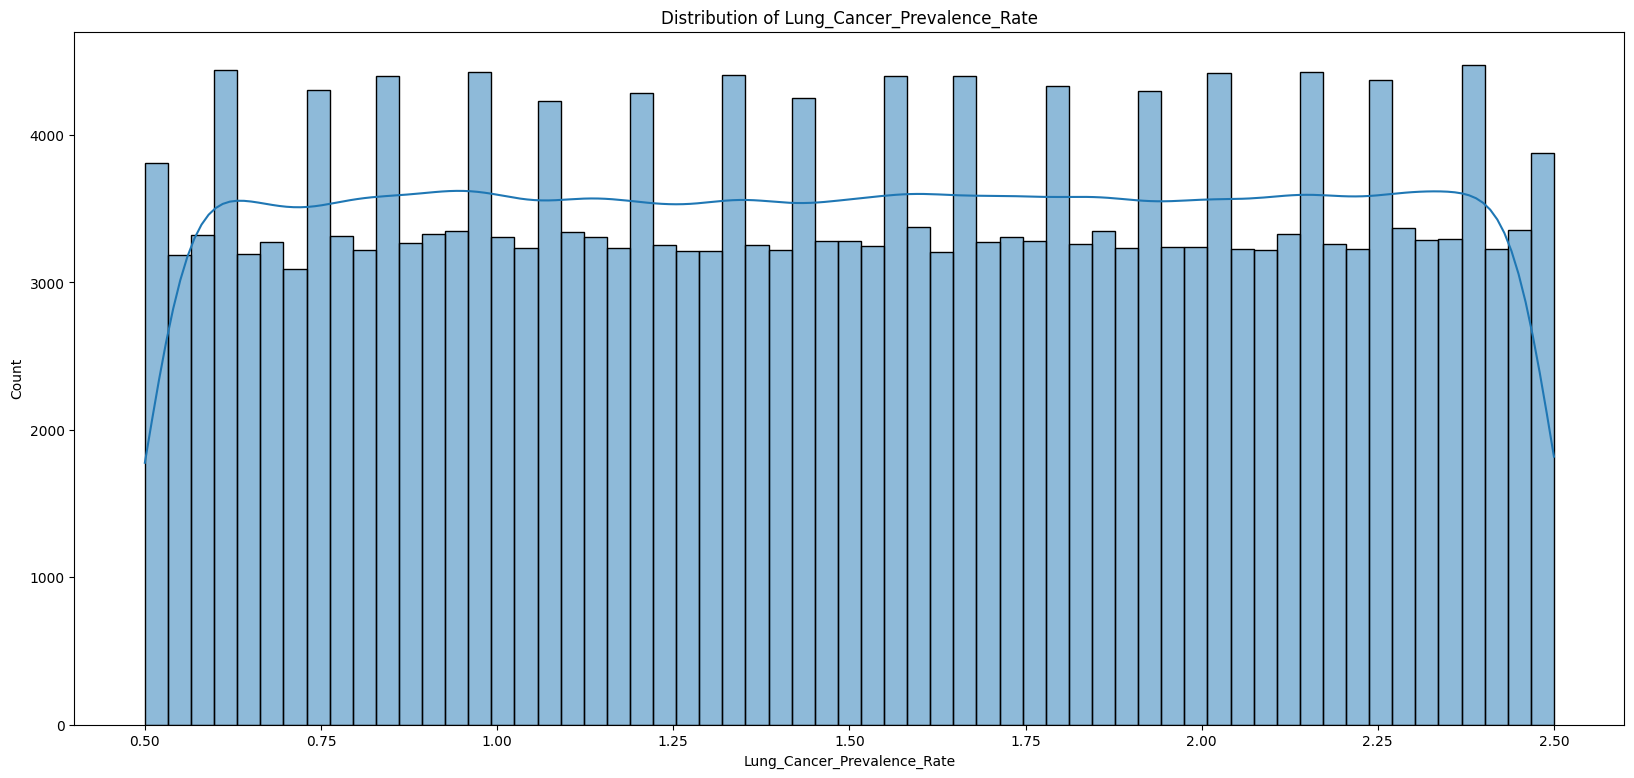

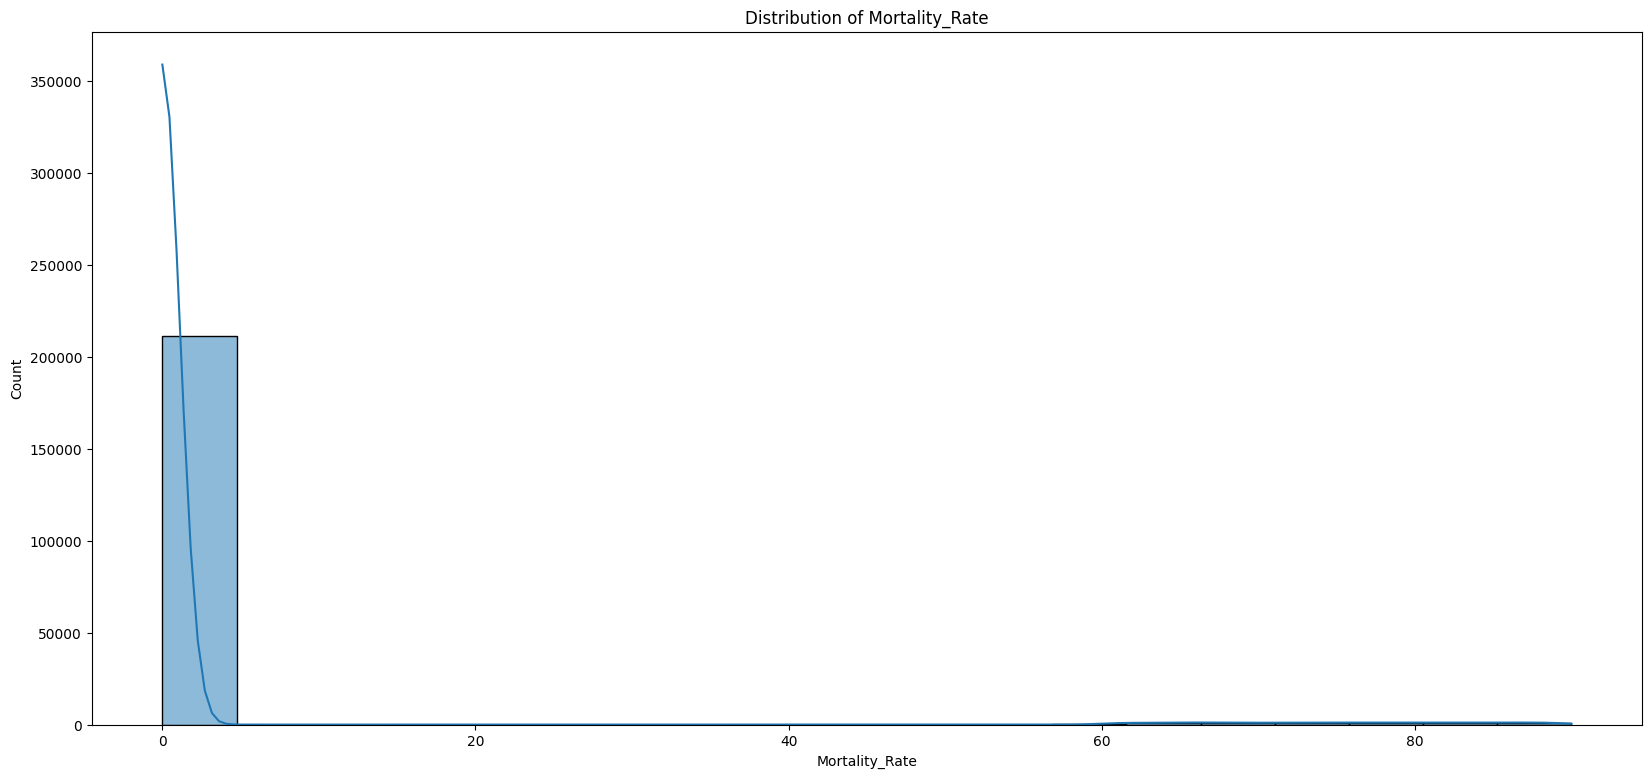

In [29]:
for col in num_cols:
    plt.figure(figsize=(20,9))
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()
    print('\n')

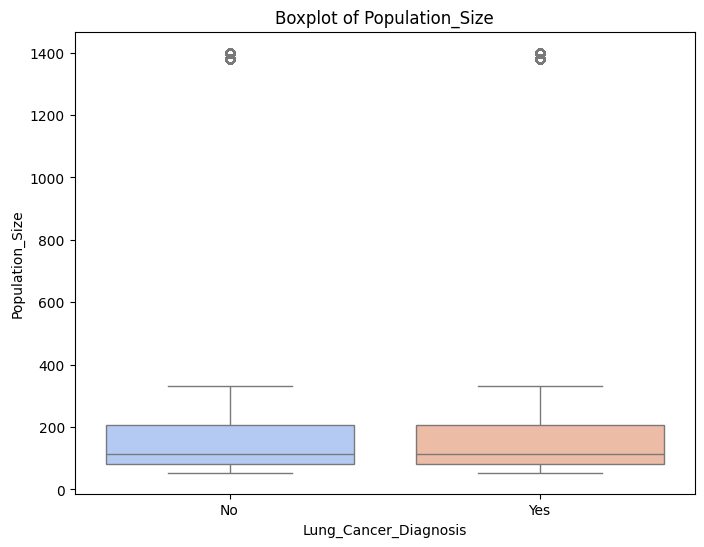

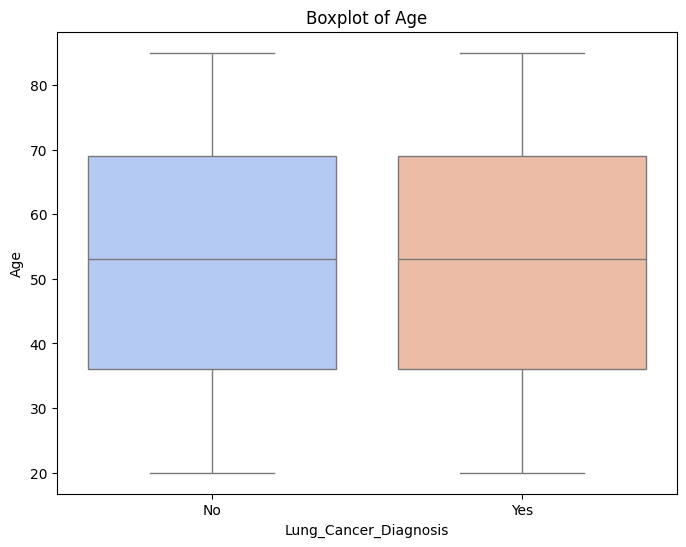

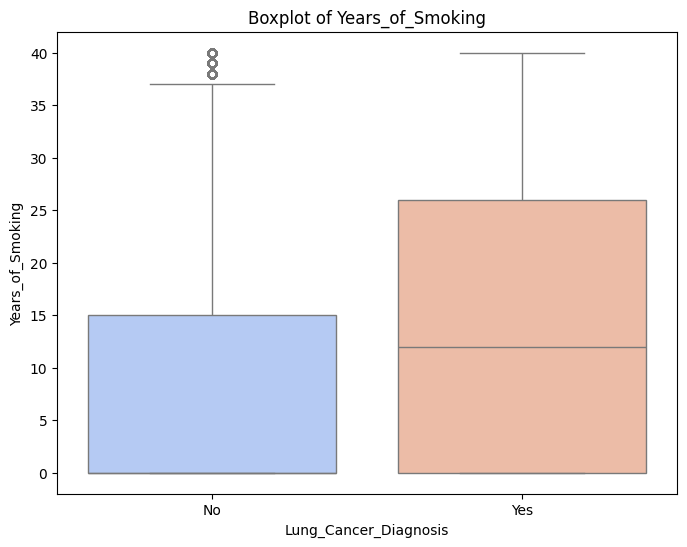

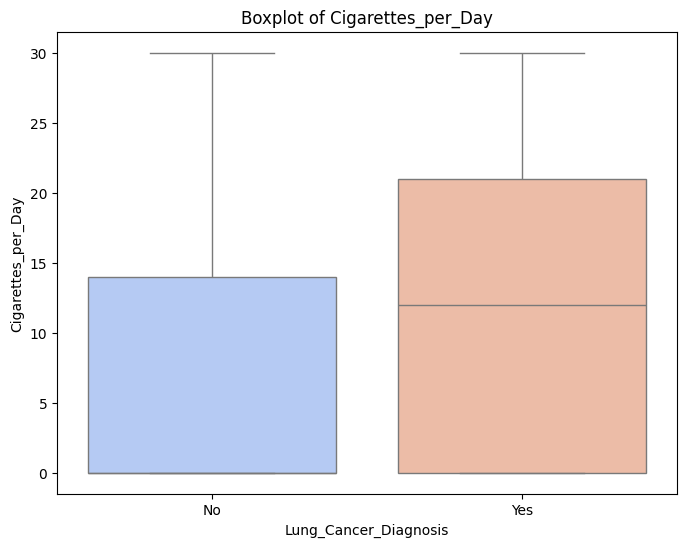

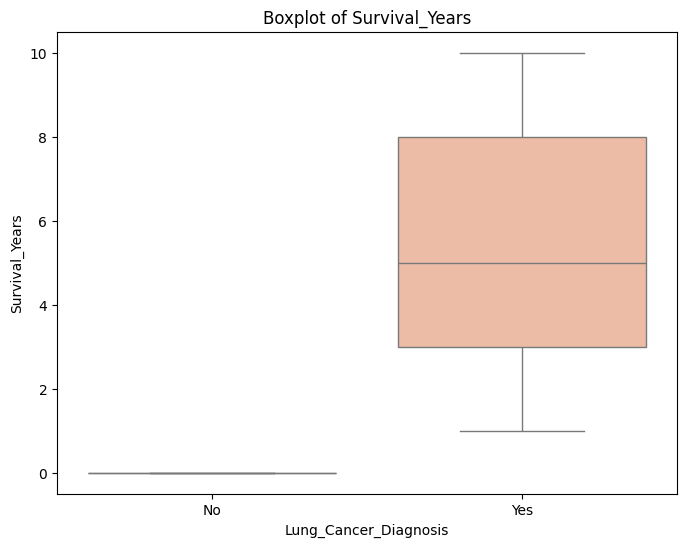

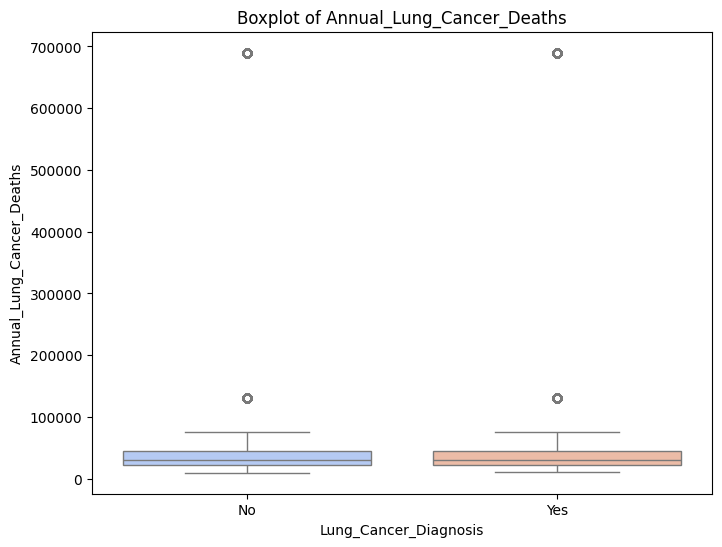

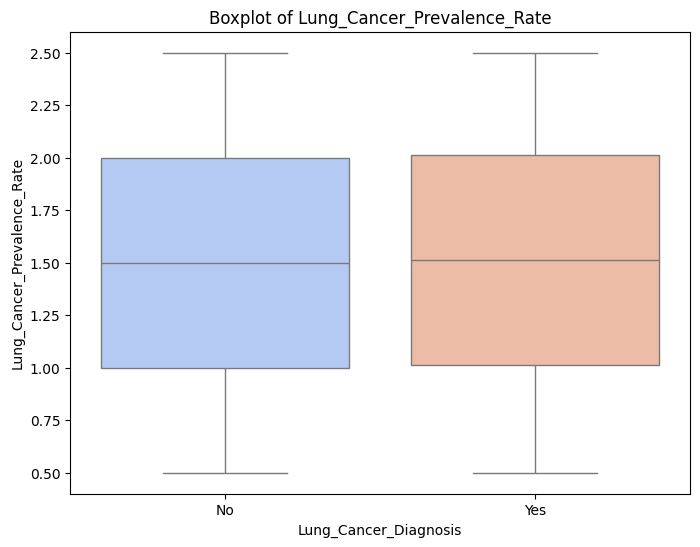

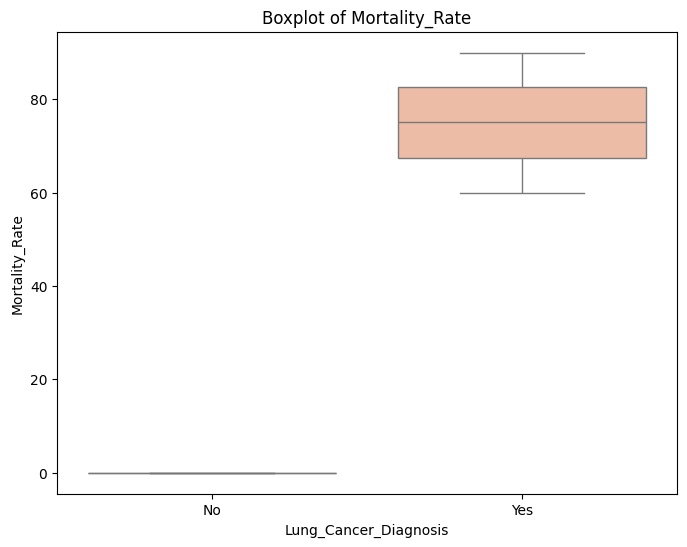

In [30]:
# numeric_cols = ['Population_Size', 'Years_of_Smoking', 'Cigarettes_per_Day',
#                 'Survival_Years', 'Annual_Lung_Cancer_Deaths', 'Mortality_Rate']

for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df,x='Lung_Cancer_Diagnosis', y=col, palette='coolwarm',hue="Lung_Cancer_Diagnosis")
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

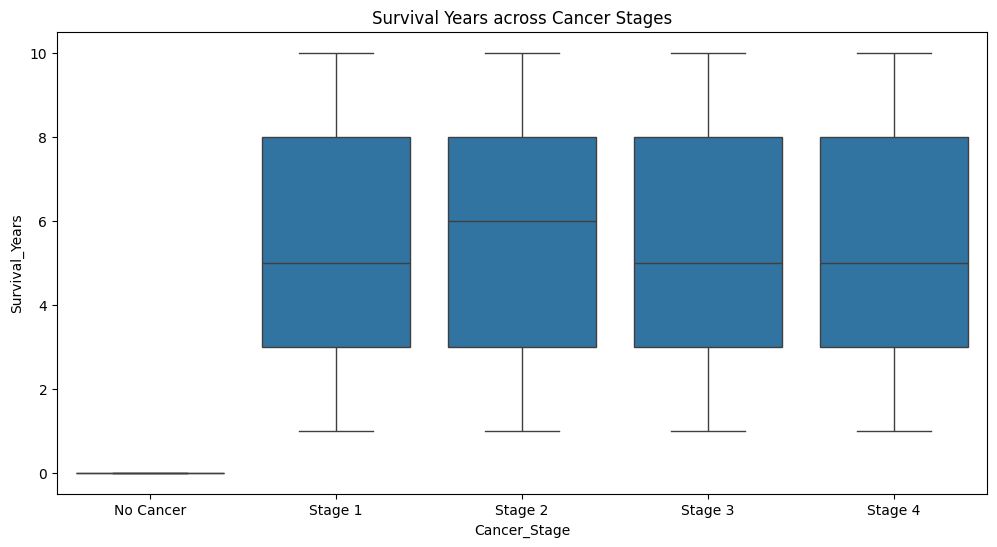

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cancer_Stage', y='Survival_Years')
plt.title("Survival Years across Cancer Stages")
plt.show()

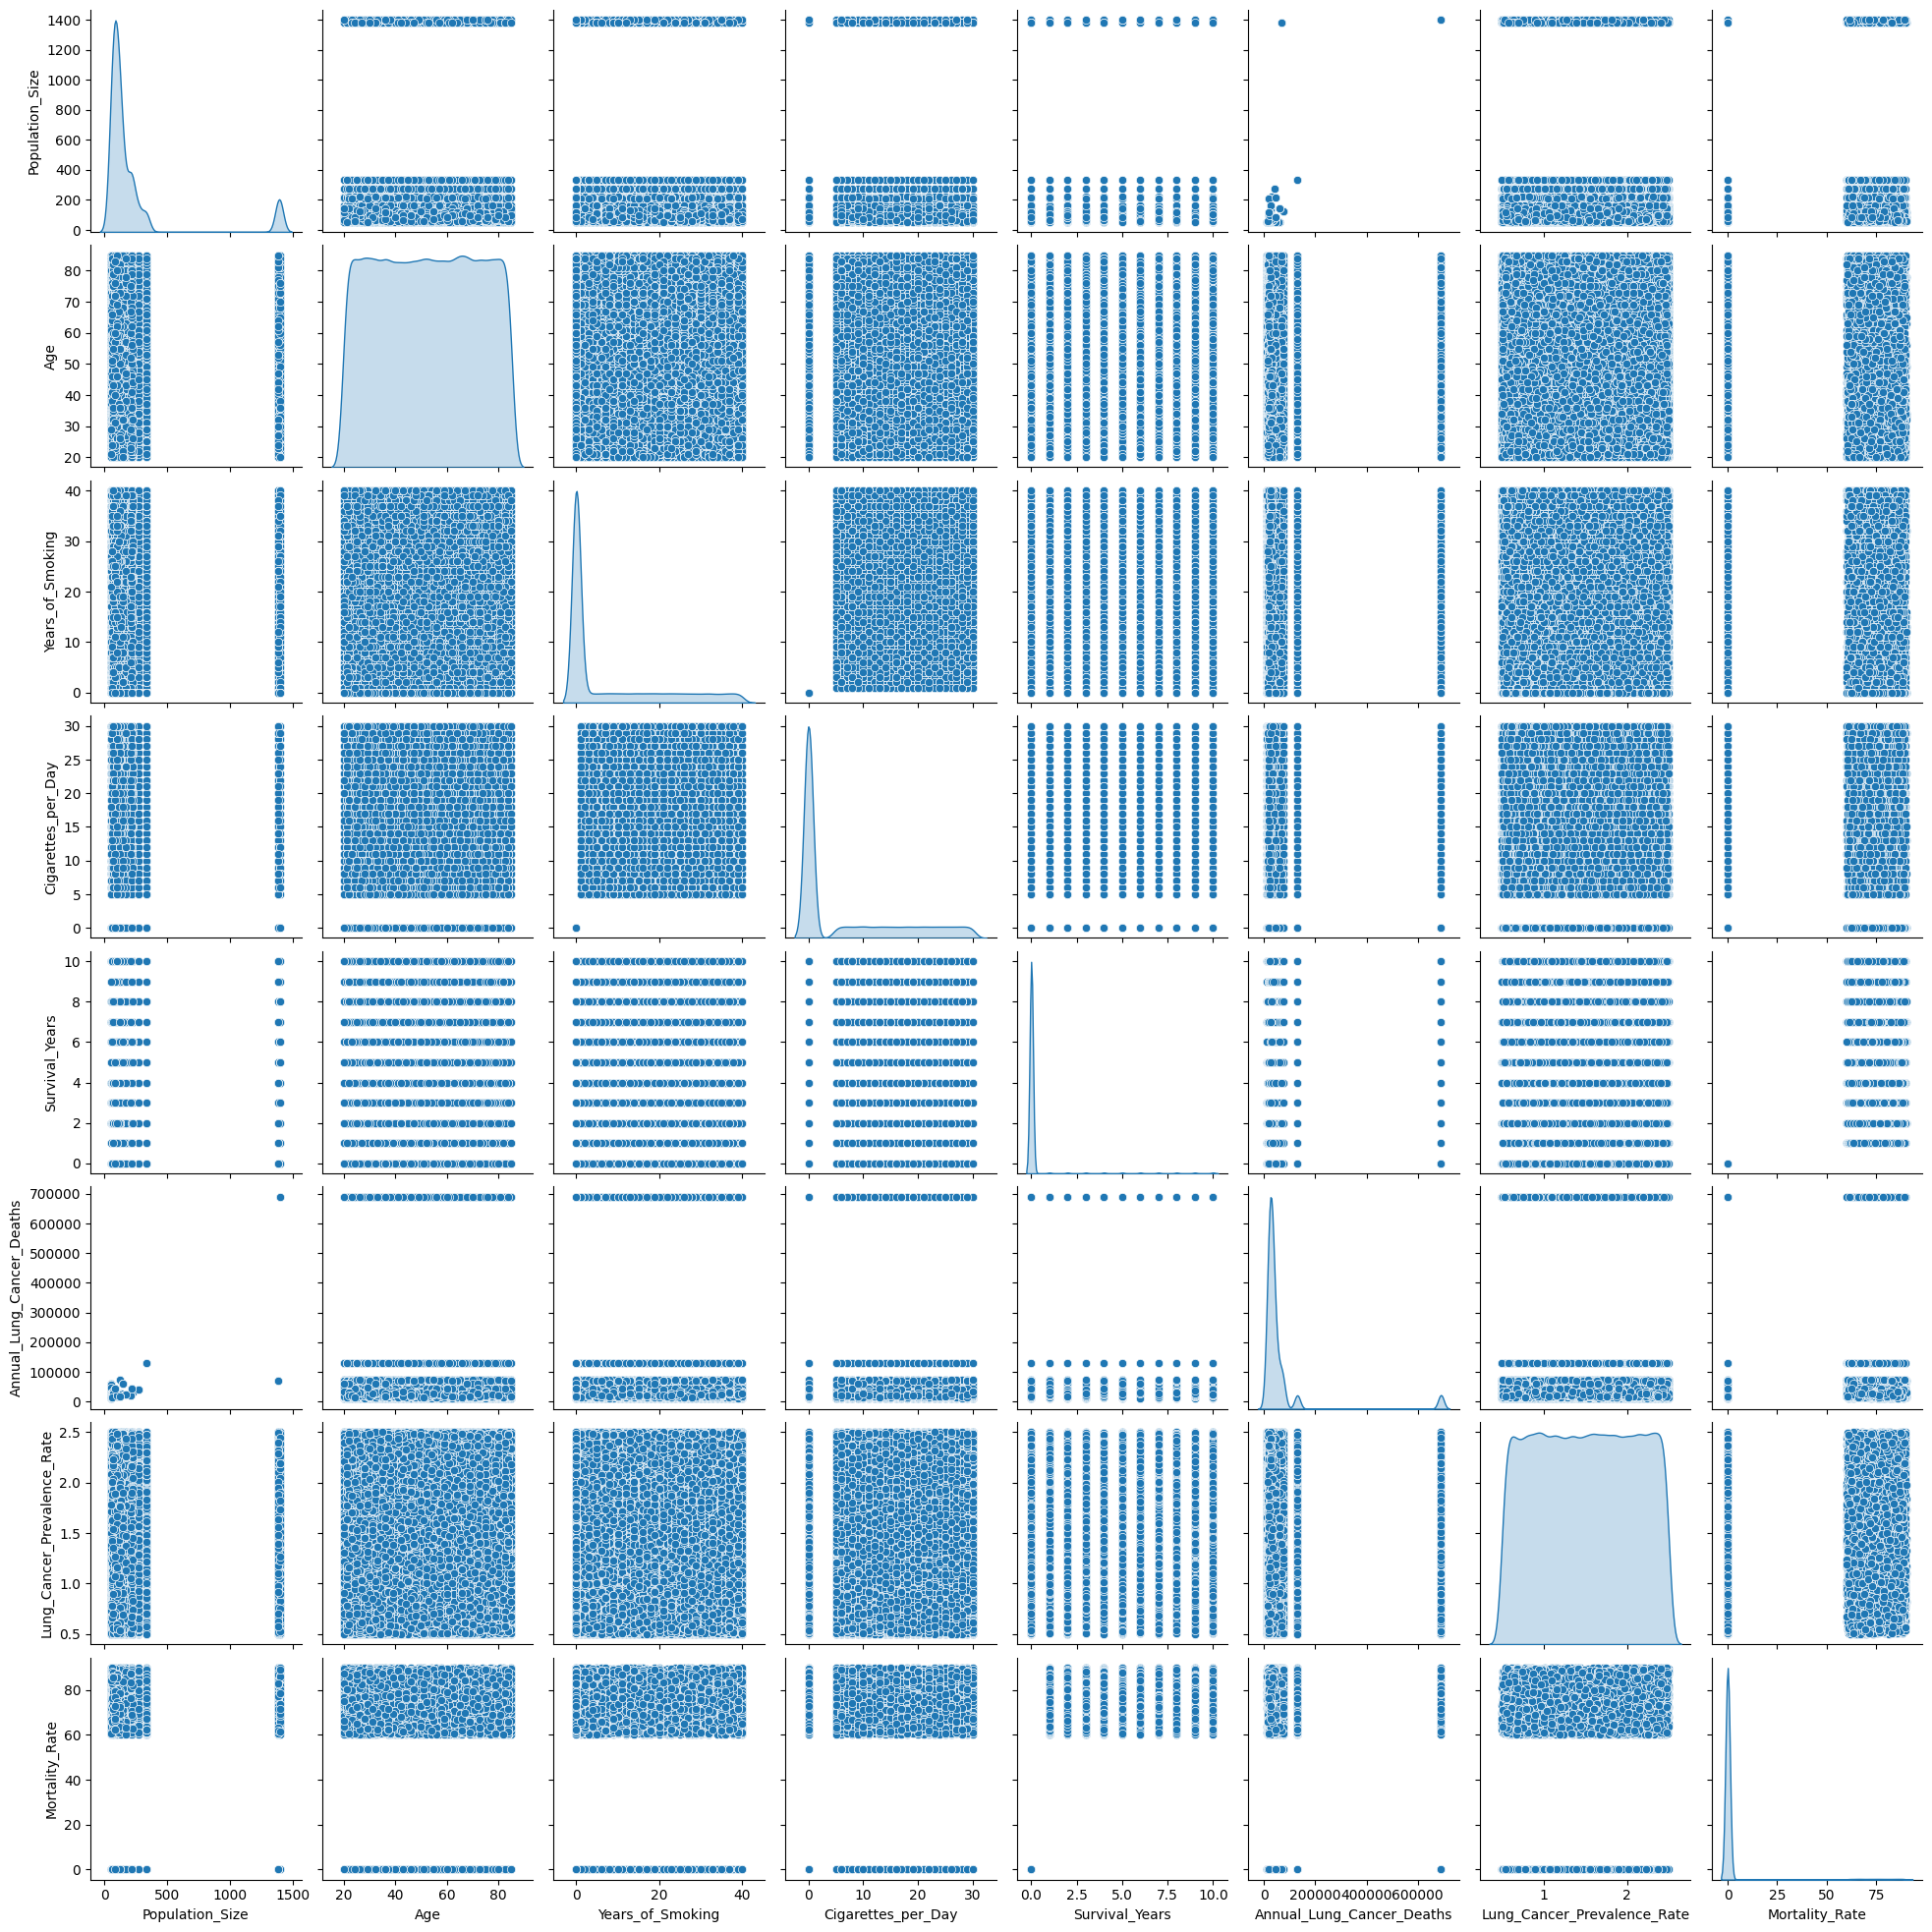

In [32]:
sns.pairplot(df[num_cols],kind='scatter',diag_kind='kde')
plt.show()

In [33]:
df.columns

Index(['Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

Handle Outliers

In [34]:
cols_to_cap = ['Annual_Lung_Cancer_Deaths', 'Years_of_Smoking'] 
for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - IQR *1.5
    upperBound = Q3 + IQR * 1.5
    
    df[col] = np.where(df[col] > upperBound, upperBound, 
                       np.where(df[col] < lowerBound, upperBound, df[col]))

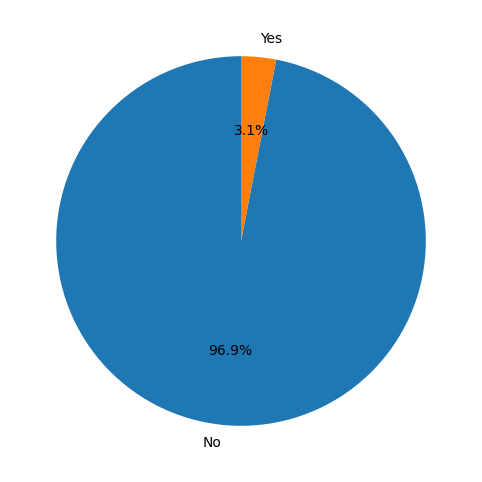

In [35]:
Lung_Cancer_count=df['Lung_Cancer_Diagnosis'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(Lung_Cancer_count.values,labels=Lung_Cancer_count.index,autopct='%1.1f%%', startangle=90)
plt.show()

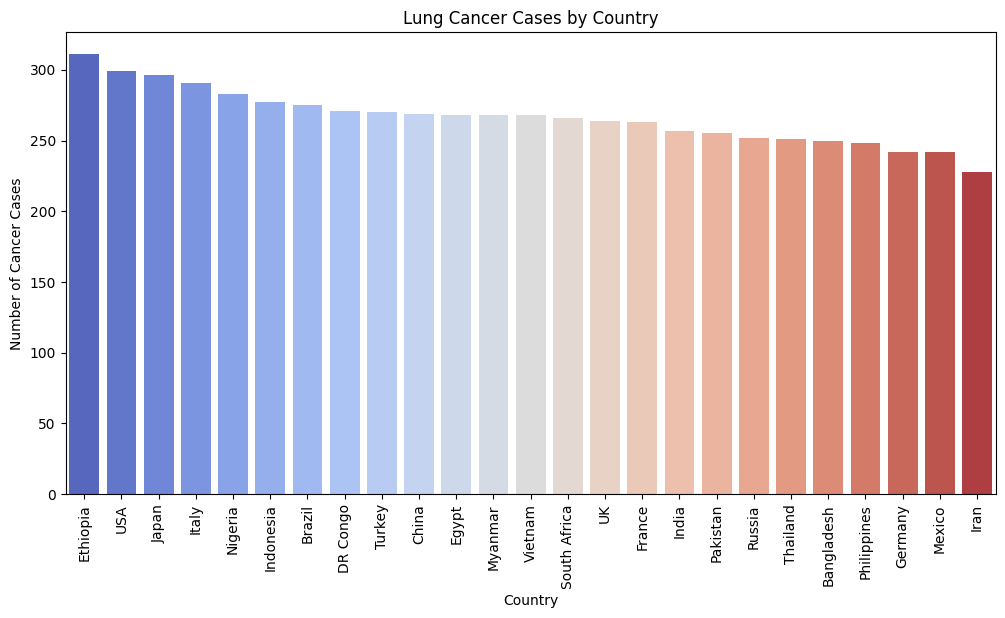

In [36]:
cancer_by_country = df[df['Lung_Cancer_Diagnosis'] == 'Yes']['Country'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cancer_by_country.index,y=cancer_by_country.values,hue=cancer_by_country.index,palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Cancer Cases")
plt.title("Lung Cancer Cases by Country")
plt.show()

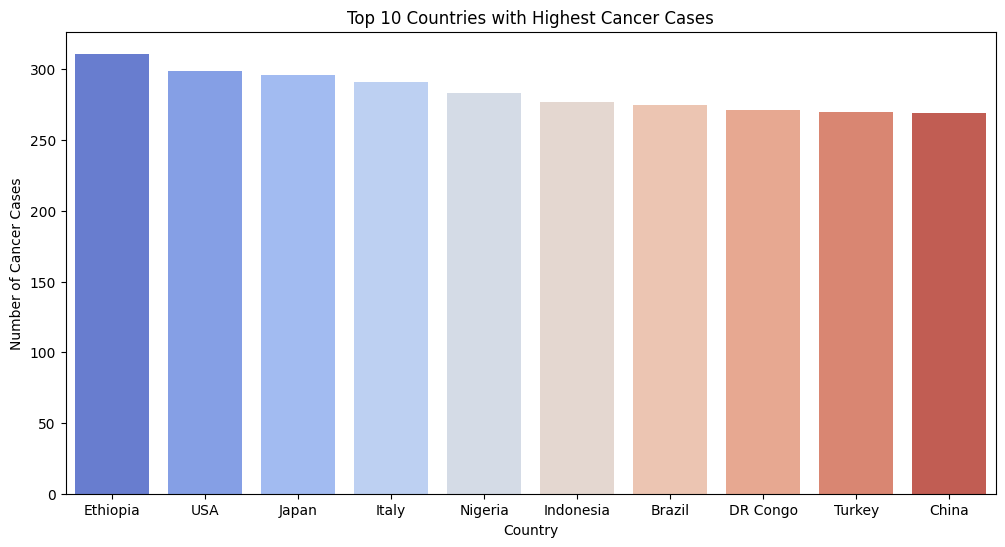

In [37]:
top_countries = df[df['Lung_Cancer_Diagnosis']=='Yes']['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index,palette='coolwarm')
plt.title('Top 10 Countries with Highest Cancer Cases')
plt.xlabel('Country')
plt.ylabel('Number of Cancer Cases')
plt.show()

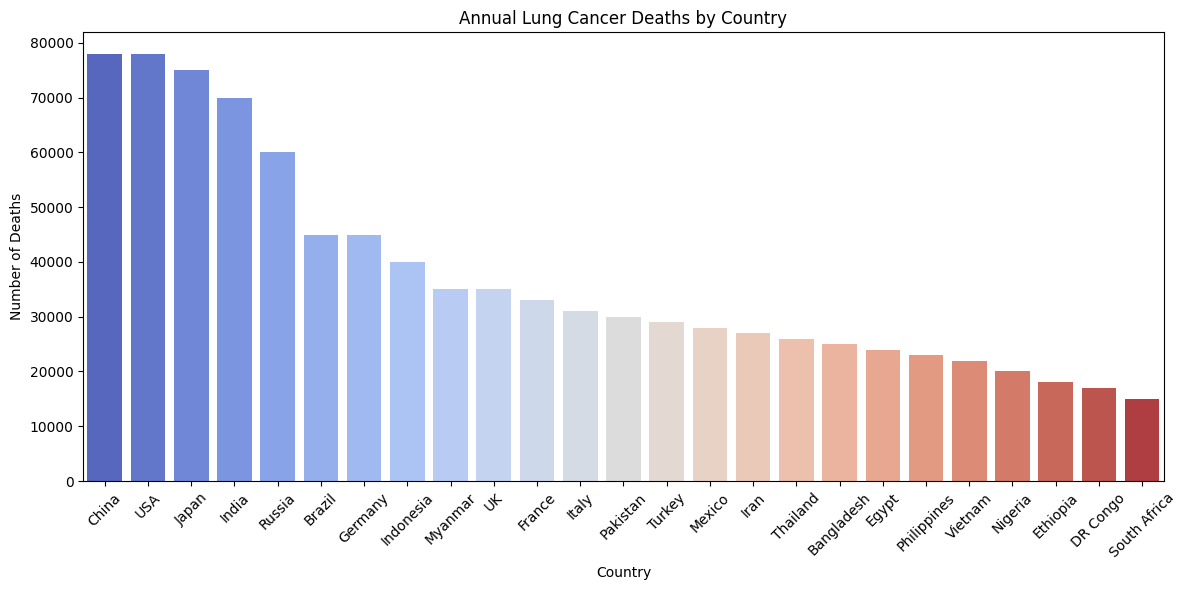

In [38]:
deaths_by_country = df.groupby('Country')['Annual_Lung_Cancer_Deaths'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=deaths_by_country.index, y=deaths_by_country.values,hue=deaths_by_country.index, palette='coolwarm')
plt.title('Annual Lung Cancer Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Engineering

Encoding Categorical Data

Mapping

In [39]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Smoker']=df['Smoker'].map({'Yes':1,'No':0})
df['Passive_Smoker']=df['Passive_Smoker'].map({'Yes':1,'No':0})
df['Family_History']= df['Family_History'].map({'Yes':1,'No':0})
df['Lung_Cancer_Diagnosis']=df['Lung_Cancer_Diagnosis'].map({'Yes':1,'No':0})
df['Early_Detection']=df['Early_Detection'].map({'Yes':1,'No':0})
df['Occupational_Exposure']=df['Occupational_Exposure'].map({'Yes':1,'No':0})
df['Indoor_Pollution']=df['Indoor_Pollution'].map({'Yes':1,'No':0})


Label Encoding

In [40]:
categorical_data = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_data:
    df[col] = le.fit_transform(df[col])

correlation With Features

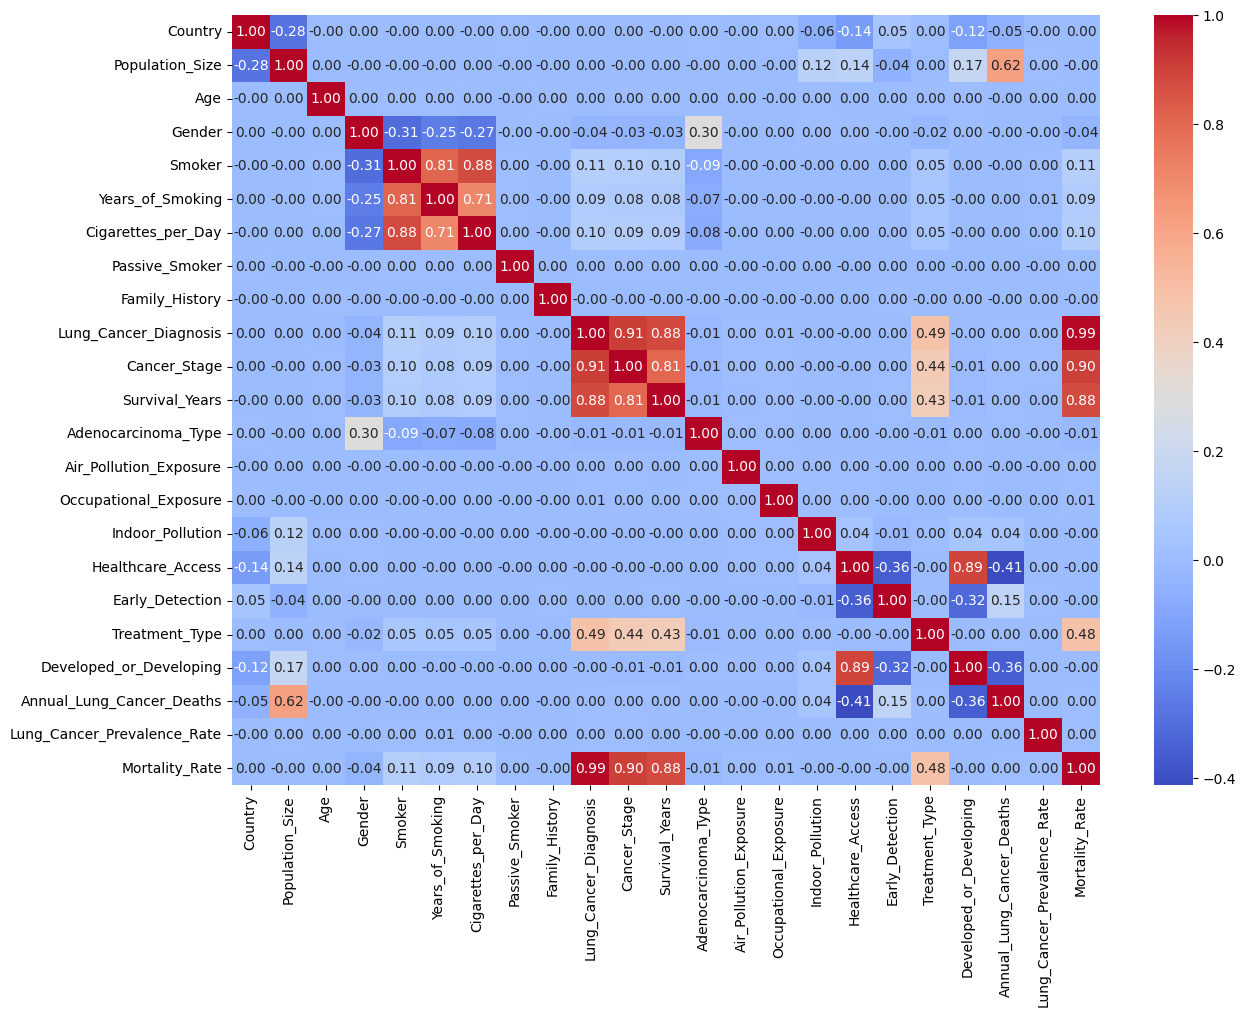

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.2f')
plt.show()

Feature Engineering

In [42]:
df['Smoking_Intensity'] = df['Years_of_Smoking'] * df['Cigarettes_per_Day']

In [43]:
pollution_cols = ['Air_Pollution_Exposure', 'Occupational_Exposure', 'Indoor_Pollution']
df['Pollution_Exposure_Score'] = df[pollution_cols].sum(axis=1)

In [44]:
#df['Dev_Pollution_Score'] = df['Pollution_Exposure_Score'] * df['Developed_or_Developing'].map({'0': 0.8, '1': 1.2})

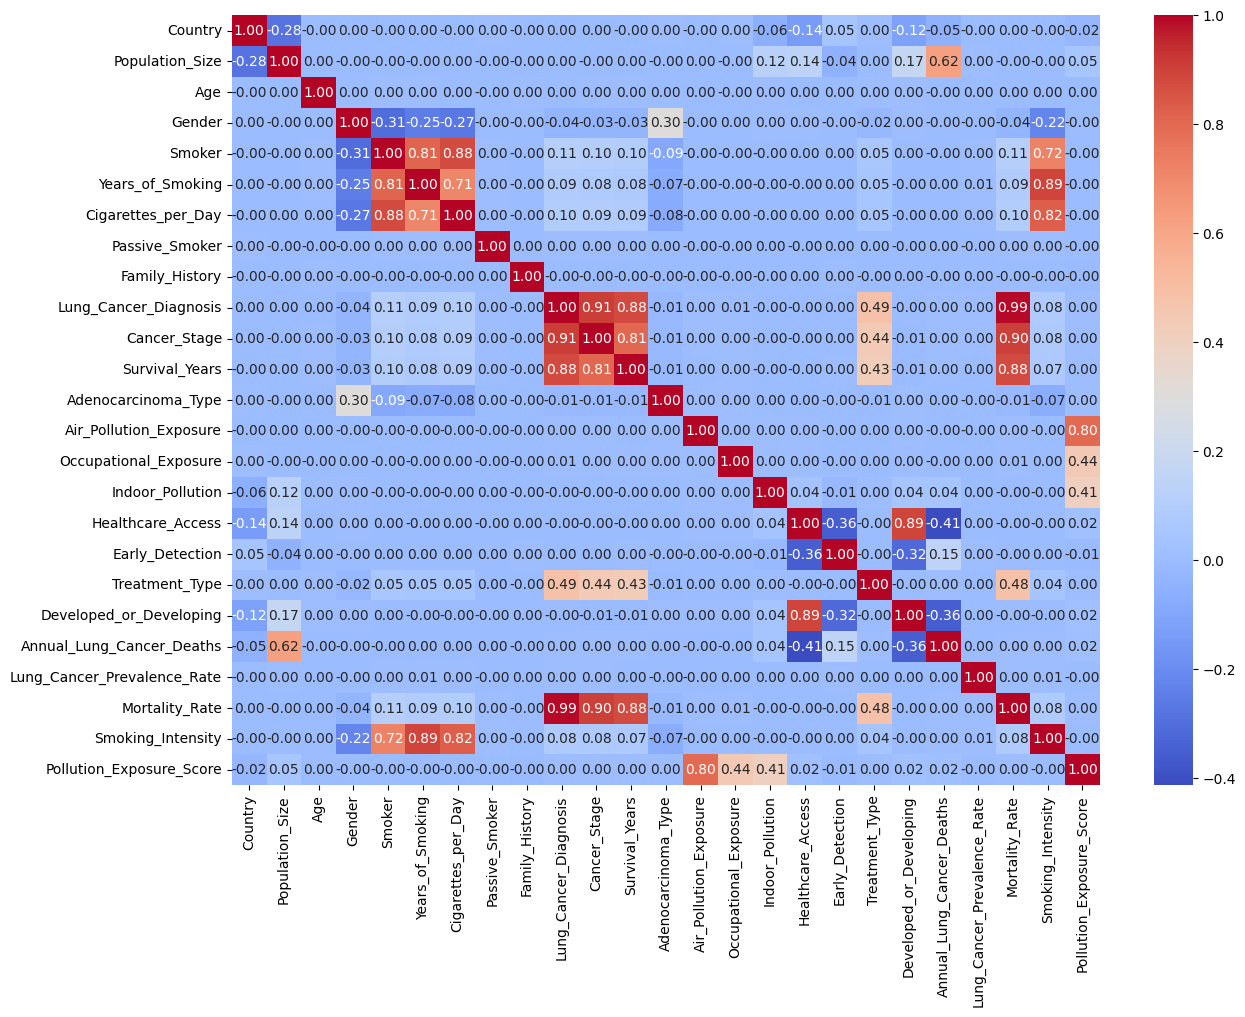

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.2f')
plt.show()

In [46]:
# from sklearn.ensemble import RandomForestClassifier
# X=df.drop(columns=['Lung_Cancer_Diagnosis'])
# model = RandomForestClassifier()
# model.fit(X, df['Lung_Cancer_Diagnosis'])
# importances = pd.Series(model.feature_importances_, index=X.columns)
# print(importances.sort_values(ascending=False))

Feature Selection

In [47]:
df.drop(columns=['Age','Passive_Smoker','Family_History','Lung_Cancer_Prevalence_Rate'],inplace=True)

Correlation

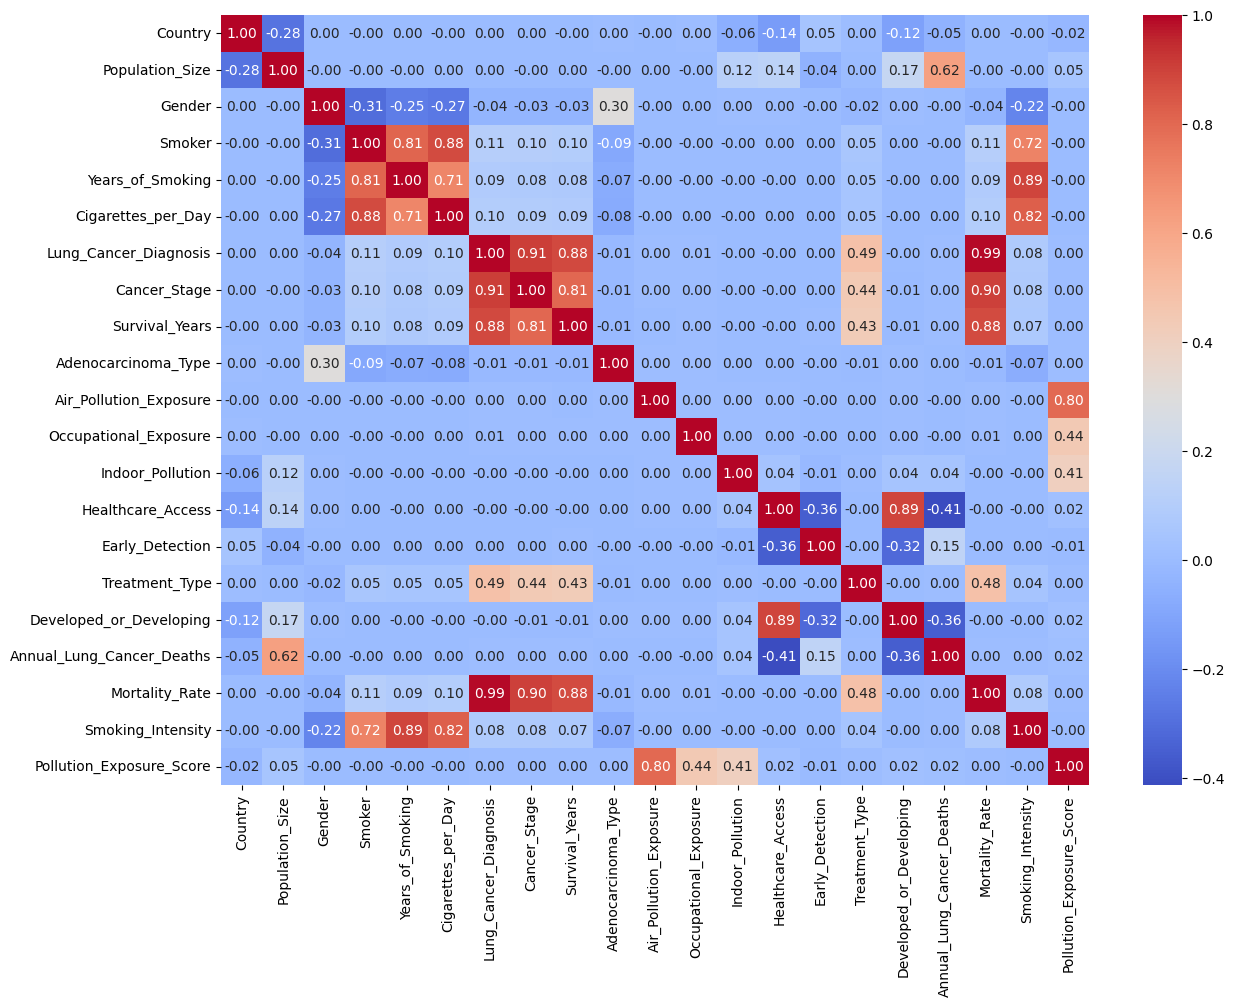

In [48]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.2f')
plt.show()

In [49]:
# sns.boxplot(data=df,x='Lung_Cancer_Diagnosis',y='Cigarettes_per_Day')
# plt.show()

In [50]:
# sns.boxplot(data=df,x='Lung_Cancer_Diagnosis',y='Years_of_Smoking')
# plt.show()